# Main Tasks
1. Packages
2. Dataset
3. Exploratory Data Analysis (EDA)
    - 3.1. User related features (basic information)
    - 3.2 User related feature (financial specific - income)
    - 3.3 User feature (financial specific - credit scores)
    - 3.4 User feature (financial specific - credit lines)

## 1. Packages

In [1]:
import pandas as pd
import numpy as np

import math
import time

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 2. Dataset

In [2]:
loan = pd.read_csv("/Users/wuchenhong/Documents/Bittiger/Capstone/LoanStats_2018Q1.csv", header = 1, 
                   low_memory = False)

In [3]:
# 107866 loan applications and 145 columns
print(loan.shape)
loan.head()

(107866, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7000.0,7000.0,7000.0,36 months,7.34%,217.23,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000.0,5000.0,5000.0,36 months,7.96%,156.59,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,17000.0,17000.0,17000.0,36 months,10.90%,555.76,B,B4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,5.31%,602.21,A,A1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,25000.0,25000.0,25000.0,60 months,12.61%,563.85,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Our goal is to predict the loan status 
# Response variable, loan_status, has two NA values
loan.loan_status.isnull().sum()

2

In [5]:
# Exclude two NA values under loan_status
# 107864 loan applications and 145 columns
loan = loan[loan.loan_status.notnull()]
print(loan.shape)

(107864, 145)


## 3. Exploratory Data Analysis (EDA)
- 3.1. User related features (basic information)
- 3.2 User related feature (financial specific - income)
- 3.3 User feature (financial specific - credit scores)
- 3.4 User feature (financial specific - credit lines)

In [9]:
for each in loan:
    if loan[each].dtype == 'object':
        print('object type variable:', each)

object type variable: id
object type variable: term
object type variable: int_rate
object type variable: grade
object type variable: sub_grade
object type variable: emp_title
object type variable: emp_length
object type variable: home_ownership
object type variable: verification_status
object type variable: issue_d
object type variable: loan_status
object type variable: pymnt_plan
object type variable: purpose
object type variable: title
object type variable: zip_code
object type variable: addr_state
object type variable: earliest_cr_line
object type variable: revol_util
object type variable: initial_list_status
object type variable: last_pymnt_d
object type variable: next_pymnt_d
object type variable: last_credit_pull_d
object type variable: application_type
object type variable: verification_status_joint
object type variable: sec_app_earliest_cr_line
object type variable: hardship_flag
object type variable: hardship_type
object type variable: hardship_reason
object type variable: har

### 3.1. User related features (basic information)
- 3.1.1 member_id (Dropped)
- 3.1.2 addr_state
    - Originally 50 levels under addr_state. 
    - **Note: Too many levels and need to collapse into 5 levels by assigning each state to its corresponding region (by west or east coast).** 
- 3.1.3 zip_code (Dropped)
    - Too many levels under zip_code. Instead, use addr_state to express the similar information.
- 3.1.4 emp_length
- 3.1.5 emp_title
    - **Note: Too many levels under emp_title. Use a basic string preprocessing on it and select top K levels to express more than half of total information.**
- 3.1.6 home_ownership

#### 3.1.1 member_id

In [6]:
# 107864 NA values under member_id
loan.member_id.isnull().sum()

107864

#### 3.1.2 addr_state 
- Description: The state provided by the borrower in the loan application.
- Summary: Most loan applications came from California. 

Text(0.5,1,'addr_state')

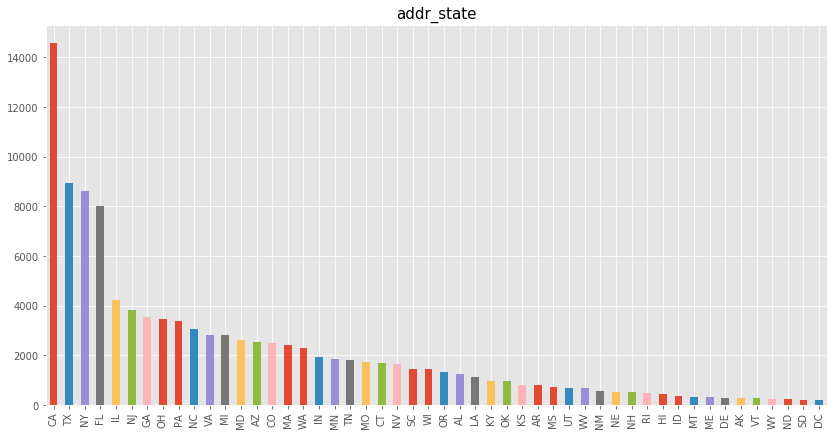

In [7]:
fig = plt.figure(figsize=(14,7))
loan.addr_state.value_counts().plot(kind = 'bar', rot = 90)
plt.title('addr_state',fontsize=15)

In [8]:
# 50 levels under addr_state (50 states)
len(loan.addr_state.unique())

50

#### 3.1.3 zip_code

In [9]:
# Too many levels under zip_code
len(loan.zip_code.unique())

878

In [10]:
loan.zip_code.value_counts()[0:10]

112xx    1175
945xx    1142
750xx    1055
300xx     973
331xx     972
606xx     961
891xx     887
070xx     857
770xx     833
104xx     807
Name: zip_code, dtype: int64

#### 3.1.4 emp_length
- Description: Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. 
- Summary: Most loan applicants have employment length more than 10 years.

Text(0.5,1,'emp_length')

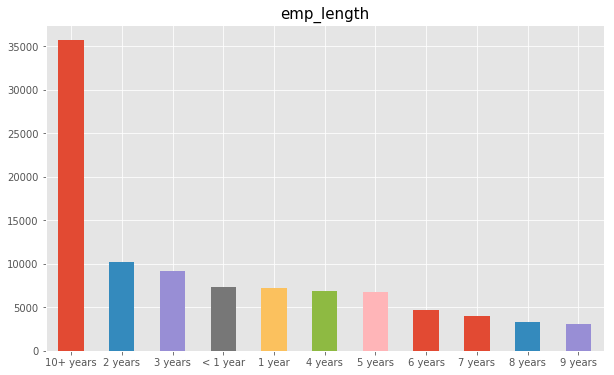

In [11]:
fig = plt.figure(figsize=(10,6))
loan.emp_length.value_counts().plot(kind = 'bar', rot = 360)
plt.title('emp_length',fontsize=15)

#### 3.1.5 emp_title
- Description: The job title supplied by the Borrower when applying for the loan.

Text(0.5,1,'emp_title')

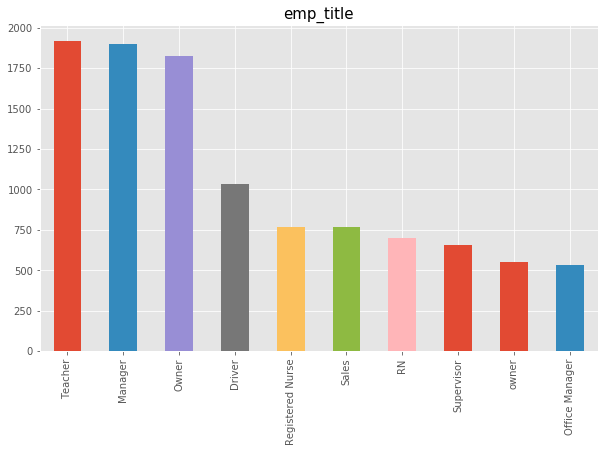

In [12]:
fig = plt.figure(figsize=(10,6))
loan.emp_title.value_counts()[0:10].plot(kind = 'bar', rot = 90)
plt.title('emp_title',fontsize=15)

In [13]:
# Too many levels under emp_title
len(loan.emp_title.unique())

37289

In [14]:
# Top 10 emp_title account for around 10% of total loan applications 
sum(loan.emp_title.value_counts()[0:10]) / loan.shape[0]

0.09880961210413113

#### 3.1.6 home_ownership
- Description: The home ownership status provided by the borrower during registration. Possible values are: RENT, OWN, MORTGAGE, and OTHER.
- Summary: Most loan applicants have a mortgage on their houses.

Text(0.5,1,'home_ownership')

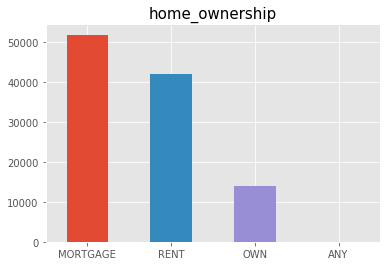

In [15]:
loan.home_ownership.value_counts().plot(kind = 'bar', rot = 360)
plt.title('home_ownership',fontsize=15)

### 3.2 User related feature (financial specific - income)
- 3.2.1 annual_inc
    - Many outliers and a very skewed distribution.
- 3.2.2 annual_inc_joint
    - Same issue as in annual_inc
- 3.2.3 verification_status
- 3.2.4 verification_status_joint
- 3.2.5 dti
    - Same issue as in annual_inc, because dti is a ratio of debt to income. (might due to the issue already found in annual_inc).
- 3.2.6 dti_joint
    - No outlier issue and a distribution close to a normal distribution.

#### 3.2.1 annual_inc
- Description: The self-reported annual income provided by the borrower during registration.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: annual_inc')

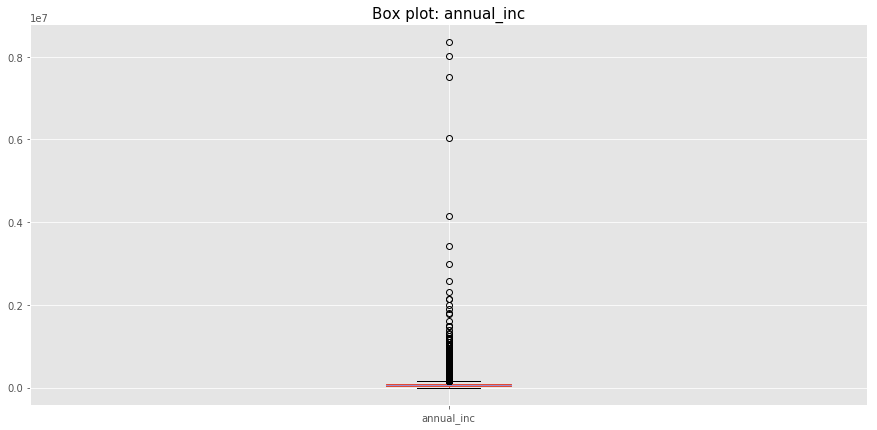

In [16]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc.plot(kind = 'box')
plt.title('Box plot: annual_inc',fontsize=15)

Text(0.5,1,'Density plot: annual_inc')

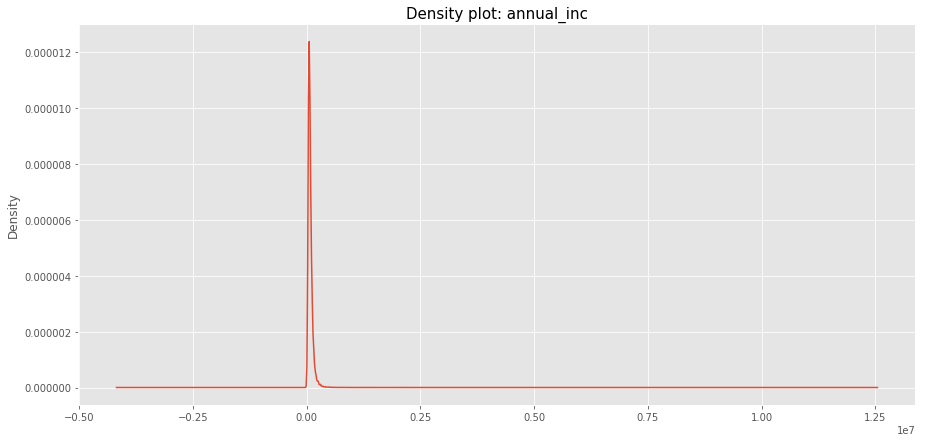

In [17]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc.plot(kind = 'density')
plt.title('Density plot: annual_inc',fontsize=15)

Text(0.5,1,'Density plot: log_annual_inc')

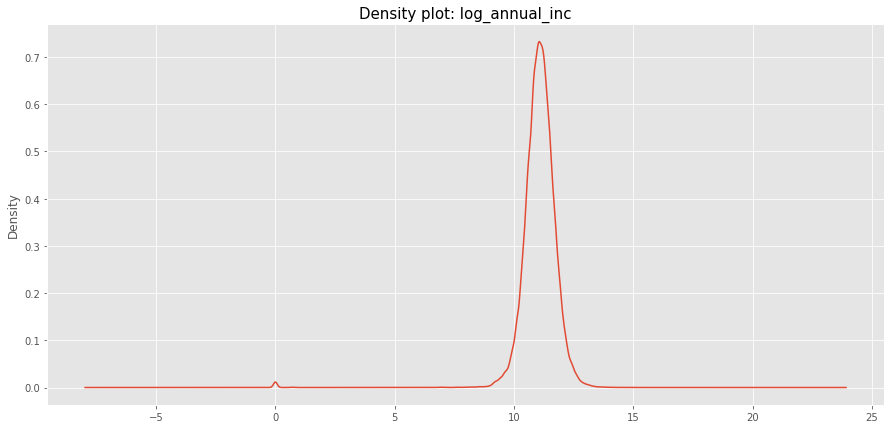

In [18]:
fig = plt.figure(figsize=(15,7))
np.log(loan.annual_inc + 1).plot(kind = 'density')
plt.title('Density plot: log_annual_inc',fontsize=15)

#### 3.2.2 annual_inc_joint
- Description: The combined self-reported annual income provided by the co-borrowers during registration.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: annual_inc_joint')

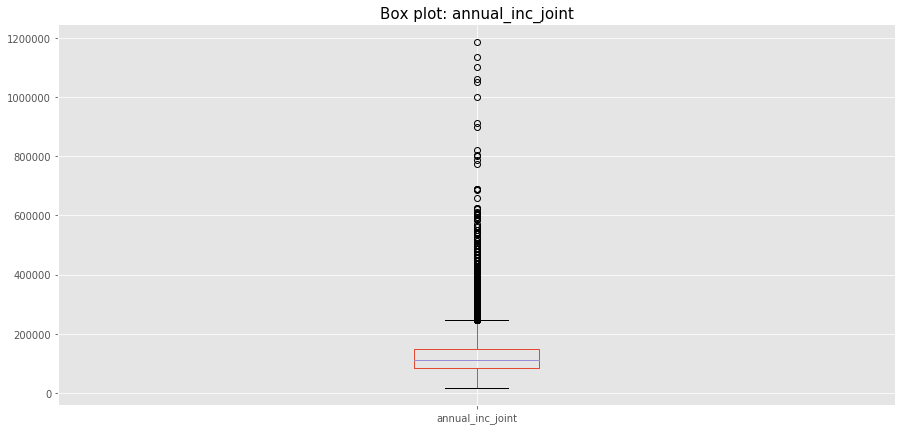

In [19]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc_joint.plot(kind = 'box')
plt.title('Box plot: annual_inc_joint',fontsize=15)

Text(0.5,1,'Density plot: annual_inc_joint')

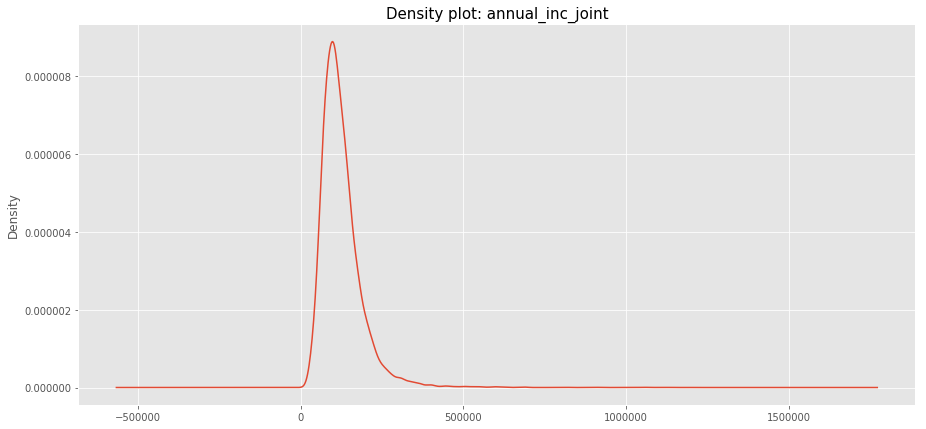

In [20]:
fig = plt.figure(figsize=(15,7))
loan.annual_inc_joint.plot(kind = 'density')
plt.title('Density plot: annual_inc_joint',fontsize=15)

Text(0.5,1,'Density plot: log_annual_inc_joint')

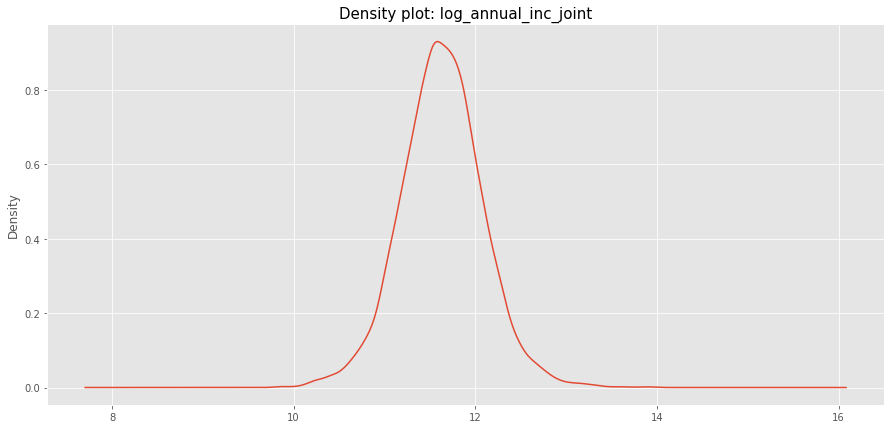

In [21]:
fig = plt.figure(figsize=(15,7))
np.log(loan.annual_inc_joint + 1).plot(kind = 'density')
plt.title('Density plot: log_annual_inc_joint',fontsize=15)

#### 3.2.3 verification_status
- Description: Indicates if income was verified by LC, not verified, or if the income source was verified. 
- Summary: Most loan applicants' income was either Income Source Verified or Not Verified.

Text(0.5,1,'verification_status')

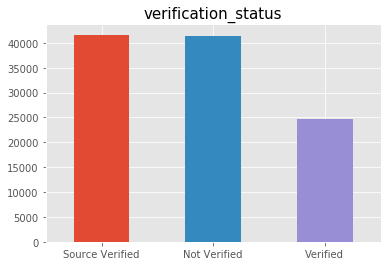

In [22]:
loan.verification_status.value_counts().plot(kind = 'bar', rot = 360)
plt.title('verification_status',fontsize=15)

#### 3.2.4 verification_status_joint
- Description: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- Summary: Most co-borrowers' joint income were not verified by LC.

Text(0.5,1,'verification_status_joint')

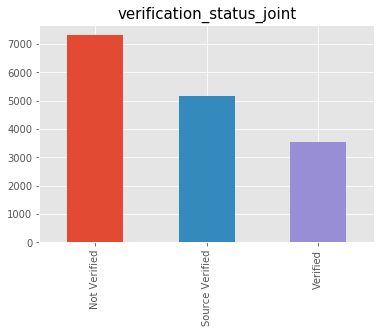

In [23]:
loan.verification_status_joint.value_counts().plot(kind = 'bar', rot = 90)
plt.title('verification_status_joint',fontsize=15)

#### 3.2.5 dti
- Description: (debt to income ratio) A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- Summary: Many outliers and a very skew distribution under dti (might due to the issue already found in annual_inc).

Text(0.5,1,'Box plot: dti')

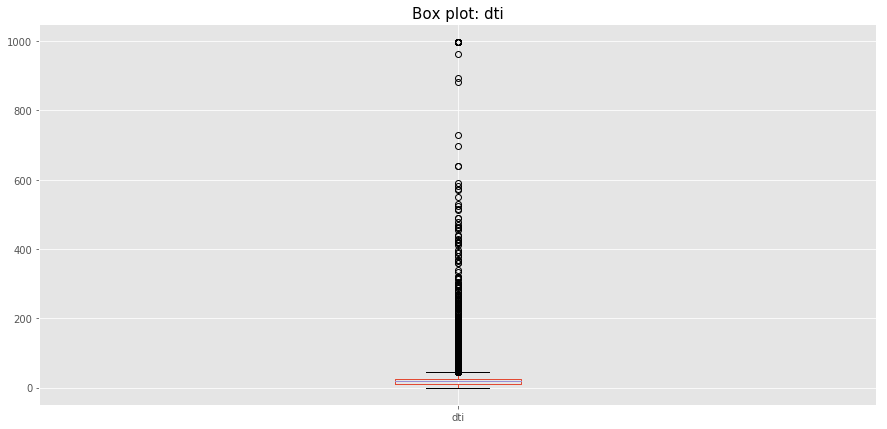

In [24]:
fig = plt.figure(figsize=(15,7))
loan.dti.plot(kind = 'box')
plt.title('Box plot: dti',fontsize=15)

Text(0.5,1,'Density plot: dti')

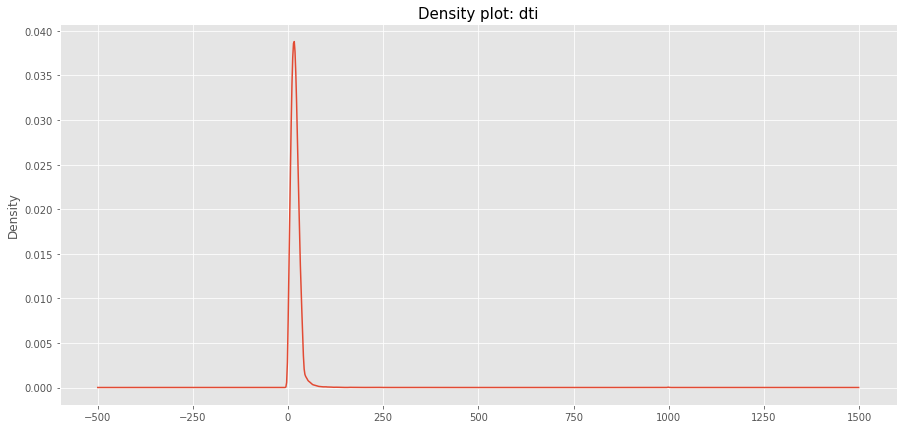

In [25]:
fig = plt.figure(figsize=(15,7))
loan.dti.plot(kind = 'density')
plt.title('Density plot: dti',fontsize=15)

Text(0.5,1,'Density plot: log_dti')

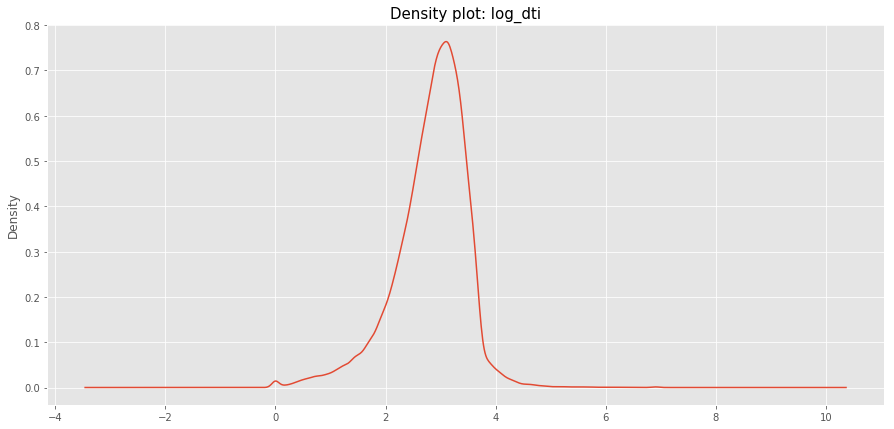

In [26]:
fig = plt.figure(figsize=(15,7))
np.log(loan.dti + 1).plot(kind = 'density')
plt.title('Density plot: log_dti',fontsize=15)

#### 3.2.6 dti_joint
- Description: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income. 
- Summary: No outlier issue and a distribution close to a normal distribution.

Text(0.5,1,'Box plot: dti_joint')

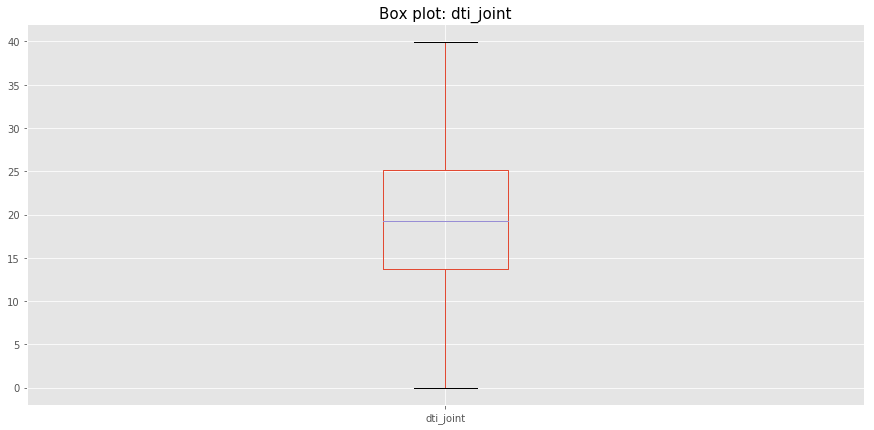

In [27]:
fig = plt.figure(figsize=(15,7))
loan.dti_joint.plot(kind = 'box')
plt.title('Box plot: dti_joint',fontsize=15)

Text(0.5,1,'Density plot: dti_joint')

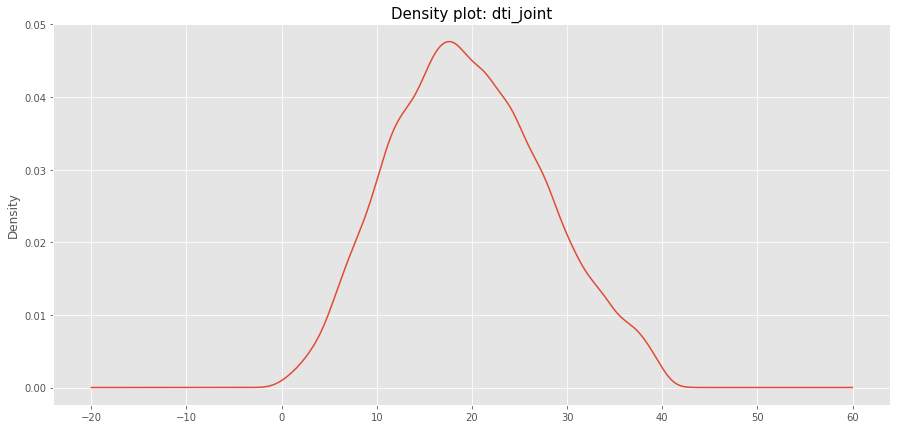

In [28]:
fig = plt.figure(figsize=(15,7))
loan.dti_joint.plot(kind = 'density')
plt.title('Density plot: dti_joint',fontsize=15)

### 3.3 User feature (financial specific - credit scores)
- 3.3.1 earliest_cr_line
    - **Note: Need a further transformation on it such as compare with other datetime type variables to attain day difference, which might explain more information rather than using itself as a variable.**
- 3.3.2 inq_fi
- 3.3.3 inq_last_12m
- 3.3.4 inq_last_6mths
- 3.3.5 mths_since_recent_inq
- 3.3.6 last_credit_pull_d

#### 3.3.1 earliest_cr_line
- Description: The month the borrower's earliest reported credit line was opened. 
- Summary: It's a datetime type variable ranged from April 1963 to September 2014.

Text(0.5,1,'earliest_cr_line')

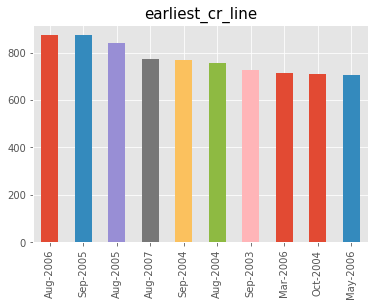

In [29]:
loan.earliest_cr_line.value_counts()[0:10].plot(kind = 'bar', rot = 90)
plt.title('earliest_cr_line',fontsize=15)

In [30]:
print(np.nanmin(loan.earliest_cr_line.values))
print(np.nanmax(loan.earliest_cr_line.values))

Apr-1963
Sep-2014


#### 3.3.2 inq_fi
- Description: Number of personal finance inquiries.
- Summary: Most loan applicants inquired 0 time on their personal finance.

Text(0.5,1,'Box plot: inq_fi')

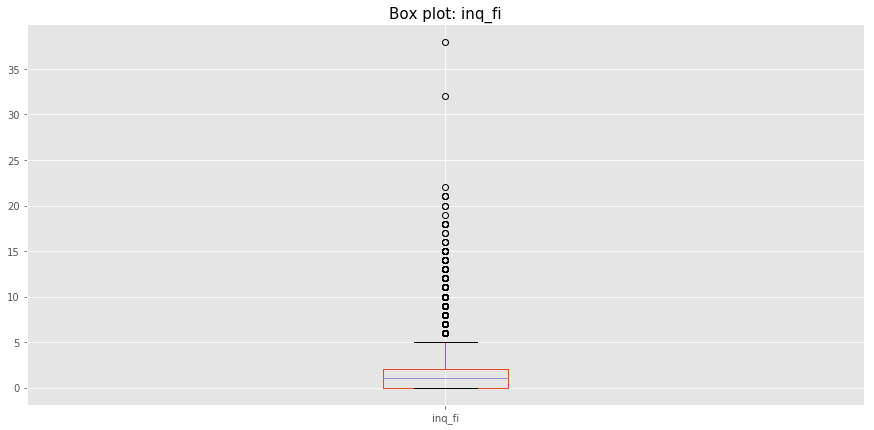

In [31]:
fig = plt.figure(figsize=(15,7))
loan.inq_fi.plot(kind = 'box')
plt.title('Box plot: inq_fi',fontsize=15)

Text(0.5,1,'inq_fi')

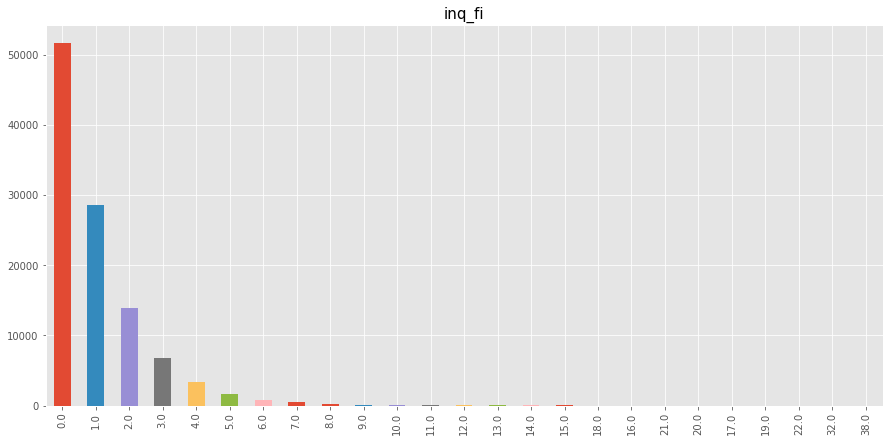

In [32]:
fig = plt.figure(figsize=(15,7))
loan.inq_fi.value_counts().plot(kind = 'bar', rot = 90)
plt.title('inq_fi',fontsize=15)

#### 3.3.3 inq_last_12m
- Description: Number of credit inquiries in past 12 months
- Summary: Most loan applicants inquired 0 time on their credit information during past 12 months.

Text(0.5,1,'Box plot: inq_last_12m')

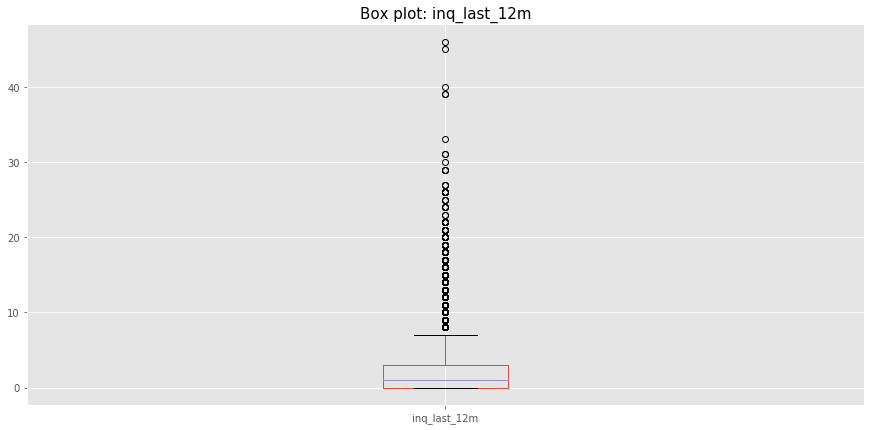

In [33]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_12m.plot(kind = 'box')
plt.title('Box plot: inq_last_12m',fontsize=15)

Text(0.5,1,'inq_last_12m')

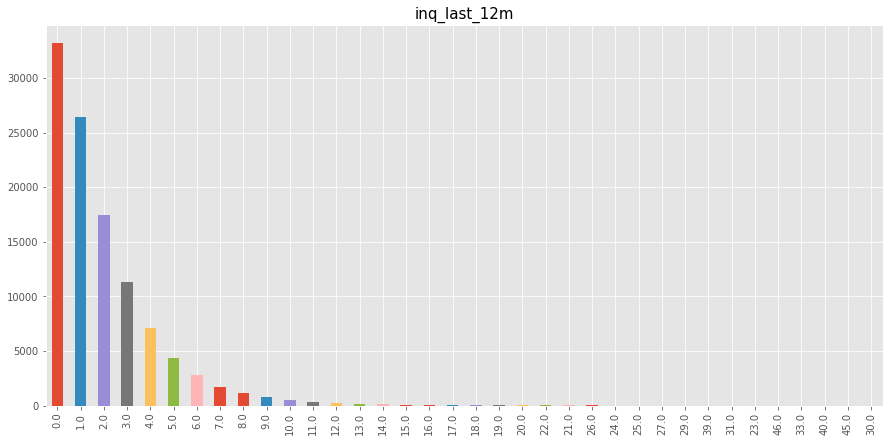

In [34]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_12m.value_counts().plot(kind = 'bar', rot = 90)
plt.title('inq_last_12m',fontsize=15)

#### 3.3.4 inq_last_6mths
- Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
- Summary: Most loan applicants inquired 0 time during past 6 months.

Text(0.5,1,'Box plot: inq_last_6mths')

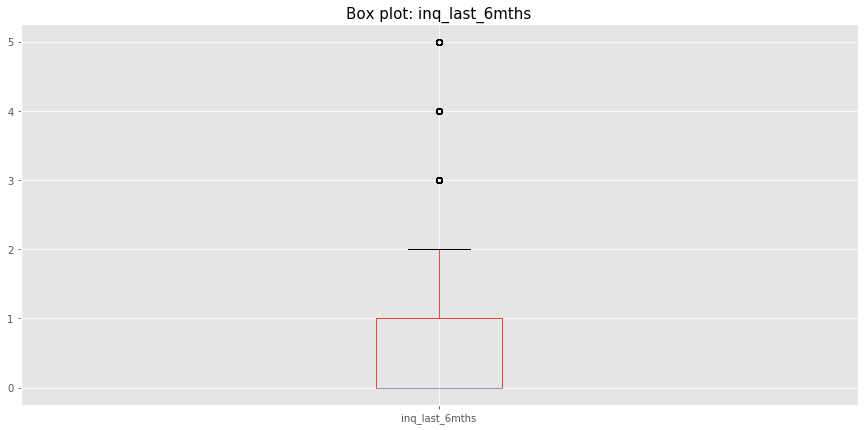

In [35]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_6mths.plot(kind = 'box')
plt.title('Box plot: inq_last_6mths',fontsize=15)

Text(0.5,1,'inq_last_6mths')

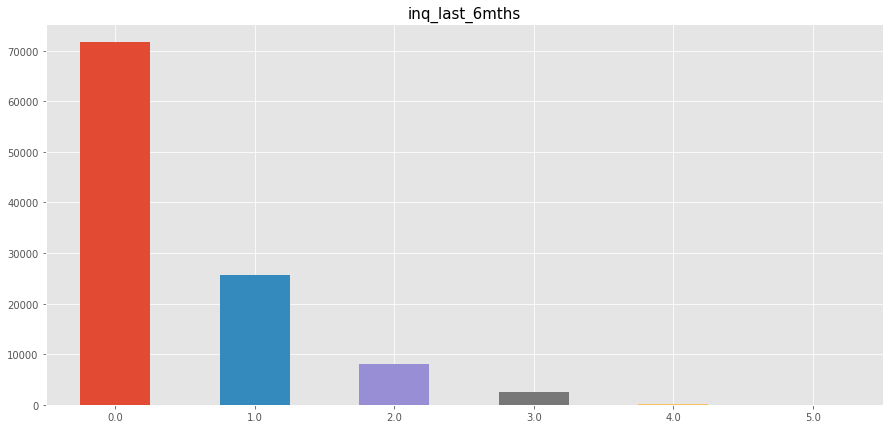

In [36]:
fig = plt.figure(figsize=(15,7))
loan.inq_last_6mths.value_counts().plot(kind = 'bar', rot = 360)
plt.title('inq_last_6mths',fontsize=15)

#### 3.3.5 mths_since_recent_inq
- Description: Months since most recent inquiry.
- Summary: Months since most recent inquiry for most loan applicants are close to recent, from 0 to 5 months.

Text(0.5,1,'Box plot: mths_since_recent_inq')

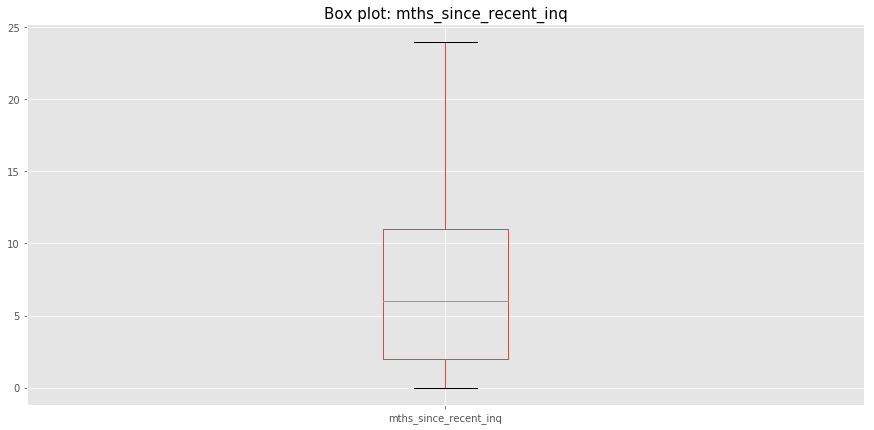

In [37]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_inq.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_inq',fontsize=15)

Text(0.5,1,'mths_since_recent_inq')

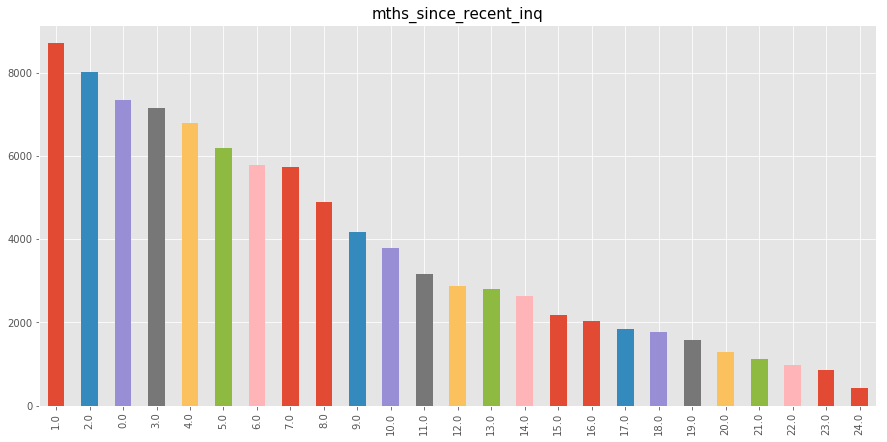

In [38]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_inq.value_counts().plot(kind = 'bar', rot = 90)
plt.title('mths_since_recent_inq',fontsize=15)

#### 3.3.6 last_credit_pull_d
- Description: The most recent month LC pulled credit for this loan.
- Summary: LC pulled credit for loans on July 2018 mostly.

Text(0.5,1,'last_credit_pull_d')

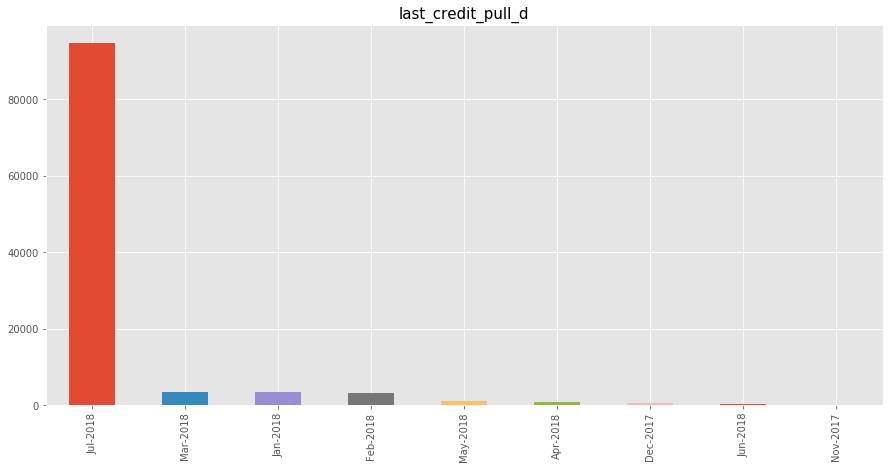

In [39]:
fig = plt.figure(figsize=(15,7))
loan.last_credit_pull_d.value_counts().plot(kind = 'bar', rot = 90)
plt.title('last_credit_pull_d',fontsize=15)

### 3.4 User feature (financial specific - credit lines)

#### 3.4.1 total_acc
- Description: The total number of credit lines currently in the borrower's credit file.
- Summary: Many outliers under total_acc, but it has a distribution close to a normal distribution.

Text(0.5,1,'Box plot: total_acc')

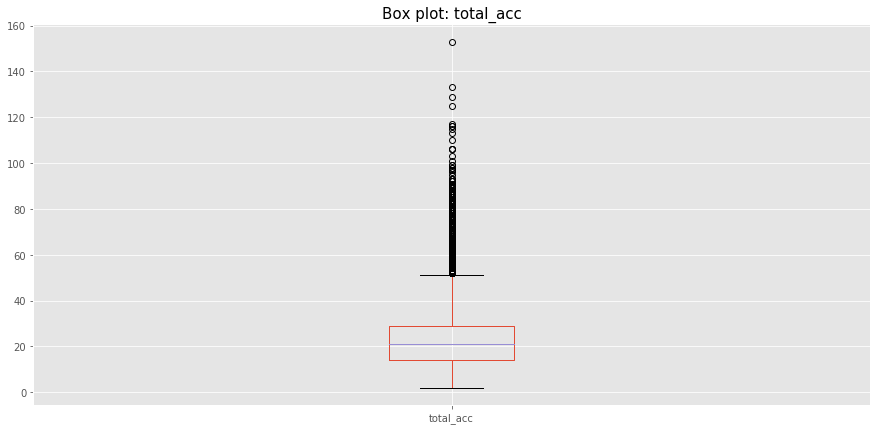

In [40]:
fig = plt.figure(figsize=(15,7))
loan.total_acc.plot(kind = 'box')
plt.title('Box plot: total_acc',fontsize=15)

Text(0.5,1,'Density plot: total_acc')

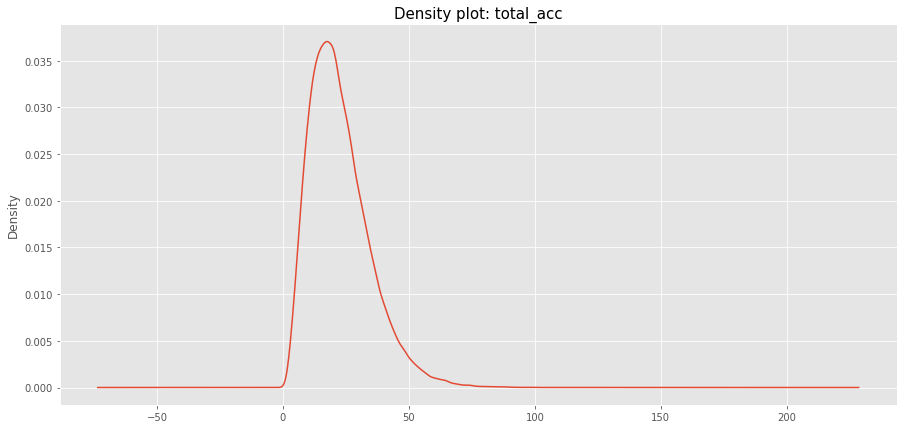

In [41]:
fig = plt.figure(figsize=(15,7))
loan.total_acc.plot(kind = 'density')
plt.title('Density plot: total_acc',fontsize=15)

#### 3.4.2 avg_cur_bal
- Description: Average current balance of all accounts.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: avg_cur_bal')

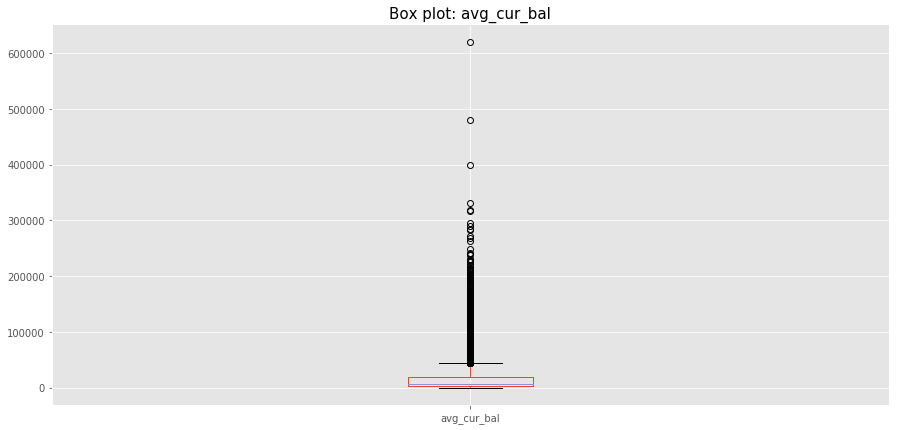

In [42]:
fig = plt.figure(figsize=(15,7))
loan.avg_cur_bal.plot(kind = 'box')
plt.title('Box plot: avg_cur_bal',fontsize=15)

Text(0.5,1,'Density plot: avg_cur_bal')

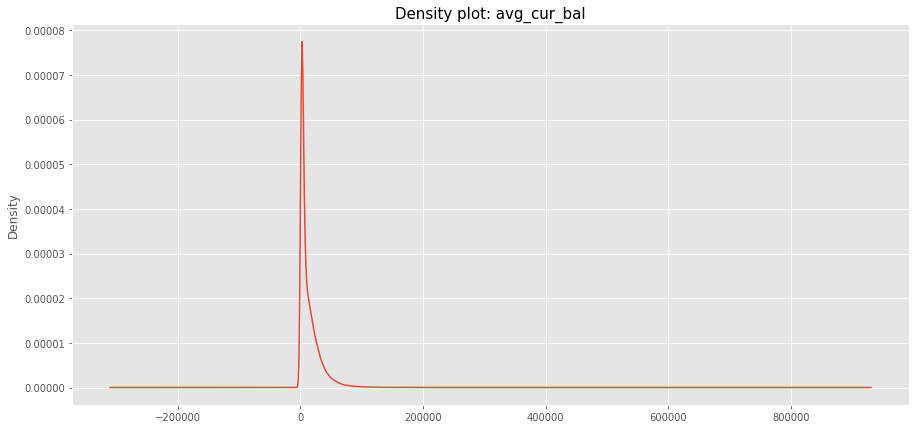

In [43]:
fig = plt.figure(figsize=(15,7))
loan.avg_cur_bal.plot(kind = 'density')
plt.title('Density plot: avg_cur_bal',fontsize=15)

#### 3.4.3 tot_cur_bal
- Description: Total current balance of all accounts. 
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: tot_cur_bal')

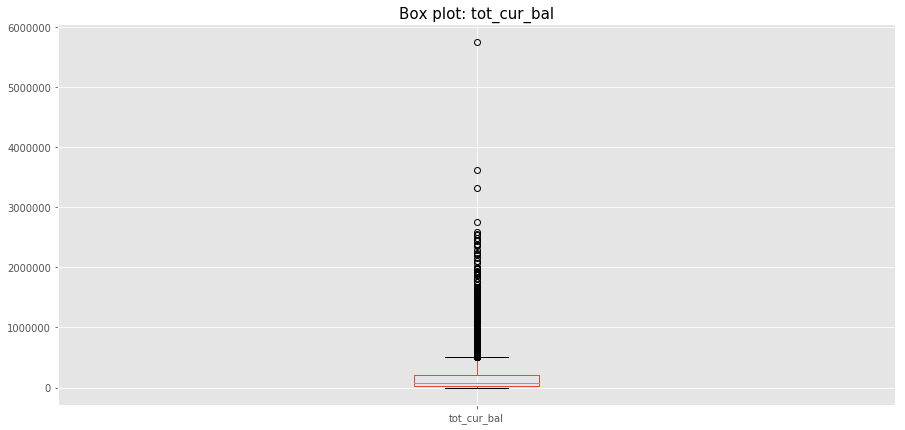

In [44]:
fig = plt.figure(figsize=(15,7))
loan.tot_cur_bal.plot(kind = 'box')
plt.title('Box plot: tot_cur_bal',fontsize=15)

Text(0.5,1,'Density plot: tot_cur_bal')

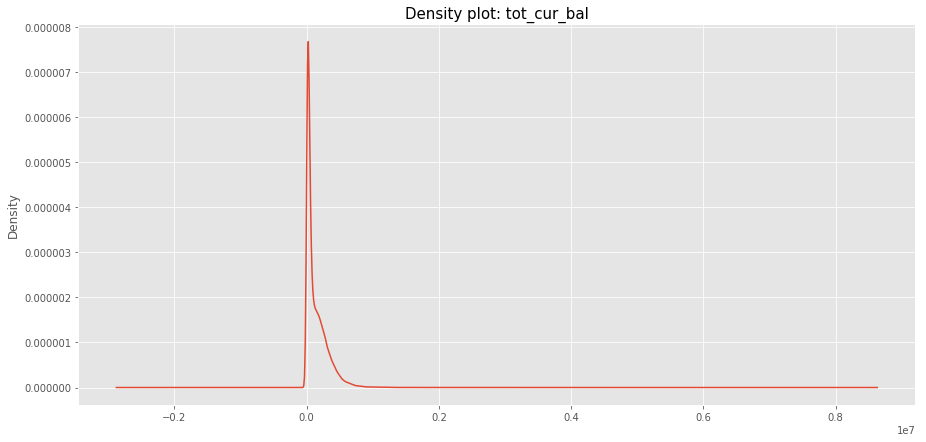

In [45]:
fig = plt.figure(figsize=(15,7))
loan.tot_cur_bal.plot(kind = 'density')
plt.title('Density plot: tot_cur_bal',fontsize=15)

#### 3.4.4 mo_sin_rcnt_tl
- Description: Months since most recent account opened.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: mo_sin_rcnt_tl')

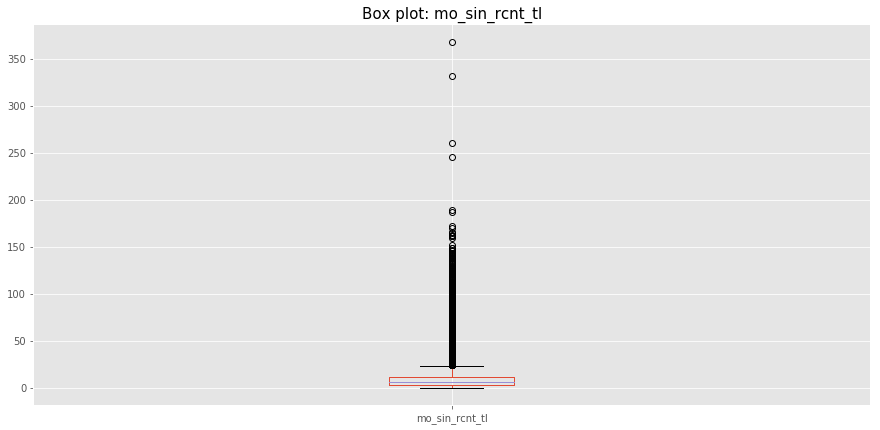

In [46]:
fig = plt.figure(figsize=(15,7))
loan.mo_sin_rcnt_tl.plot(kind = 'box')
plt.title('Box plot: mo_sin_rcnt_tl',fontsize=15)

Text(0.5,1,'Density plot: mo_sin_rcnt_tl')

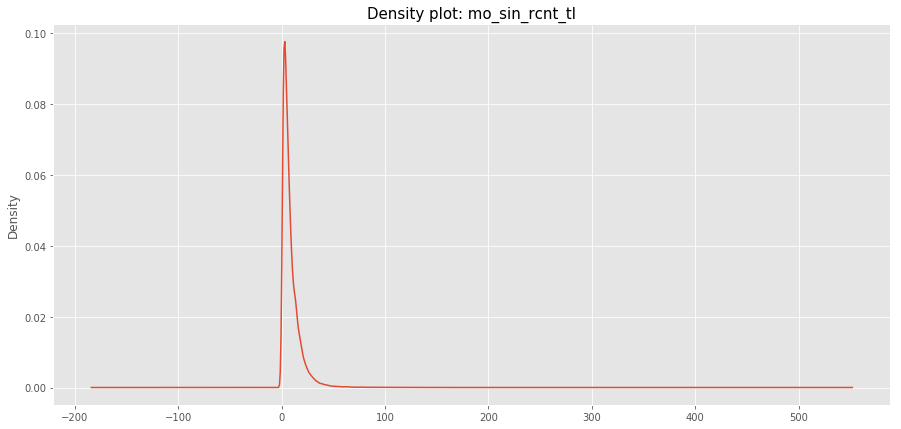

In [47]:
fig = plt.figure(figsize=(15,7))
loan.mo_sin_rcnt_tl.plot(kind = 'density')
plt.title('Density plot: mo_sin_rcnt_tl',fontsize=15)

#### 3.4.5 mort_acc
- Description: Number of mortgage accounts.
- Summary: Many outliers and a very skewed distribution. Most loan applicants have 0 mortgage accounts.

Text(0.5,1,'Box plot: mort_acc')

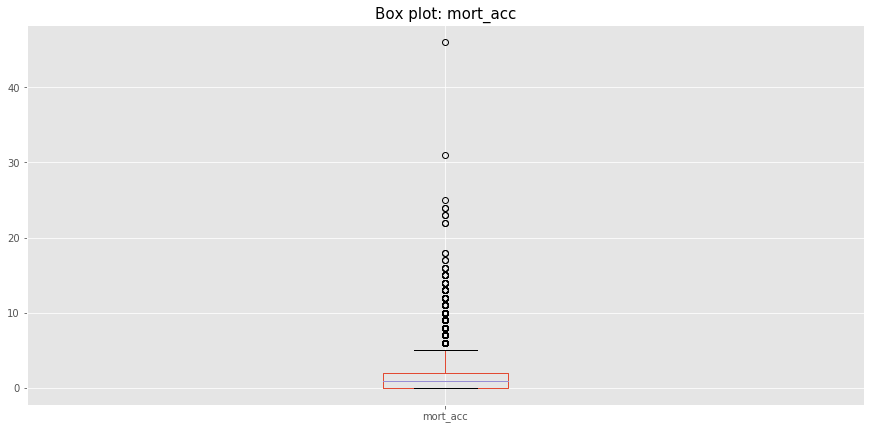

In [48]:
fig = plt.figure(figsize=(15,7))
loan.mort_acc.plot(kind = 'box')
plt.title('Box plot: mort_acc',fontsize=15)

Text(0.5,1,'Density plot: mort_acc')

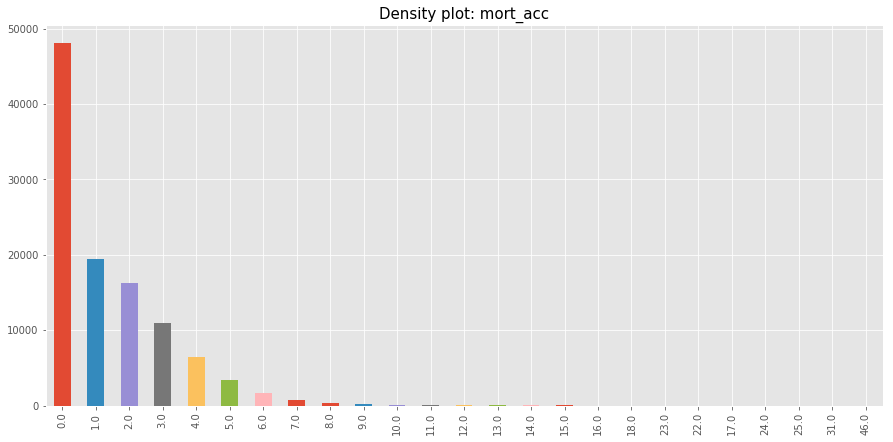

In [49]:
fig = plt.figure(figsize=(15,7))
loan.mort_acc.value_counts().plot(kind = 'bar')
plt.title('Density plot: mort_acc',fontsize=15)

Text(0.5,1,'Density plot: mort_acc')

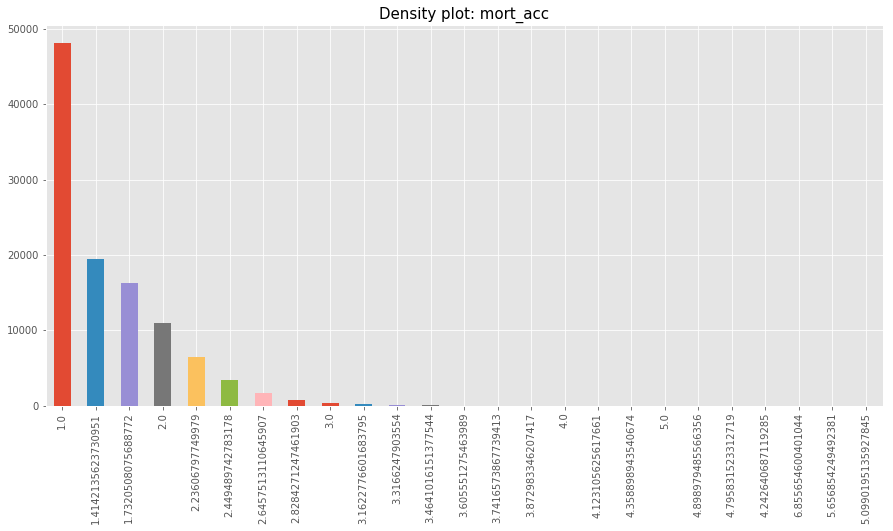

In [50]:
fig = plt.figure(figsize=(15,7))
np.sqrt(loan.mort_acc + 1).value_counts().plot(kind = 'bar')
plt.title('Density plot: mort_acc',fontsize=15)

#### 3.4.6 bc_util
- Description: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- Summary: Few outilers under bc_util.

Text(0.5,1,'Box plot: bc_util')

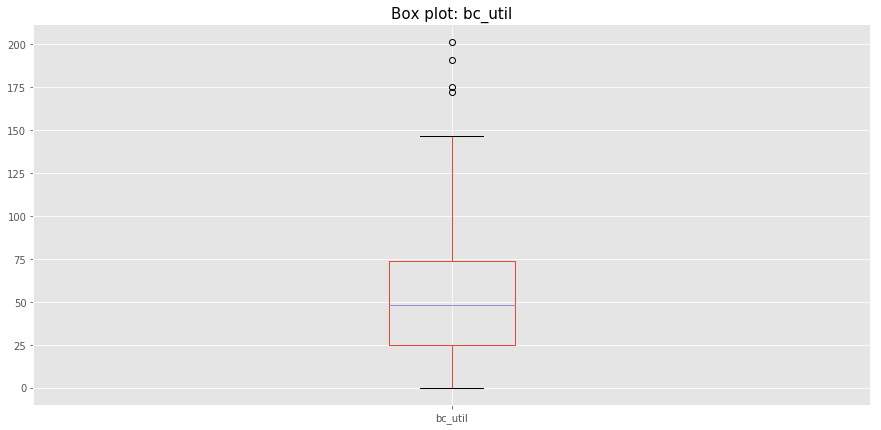

In [51]:
fig = plt.figure(figsize=(15,7))
loan.bc_util.plot(kind = 'box')
plt.title('Box plot: bc_util',fontsize=15)

Text(0.5,1,'Density plot: bc_util')

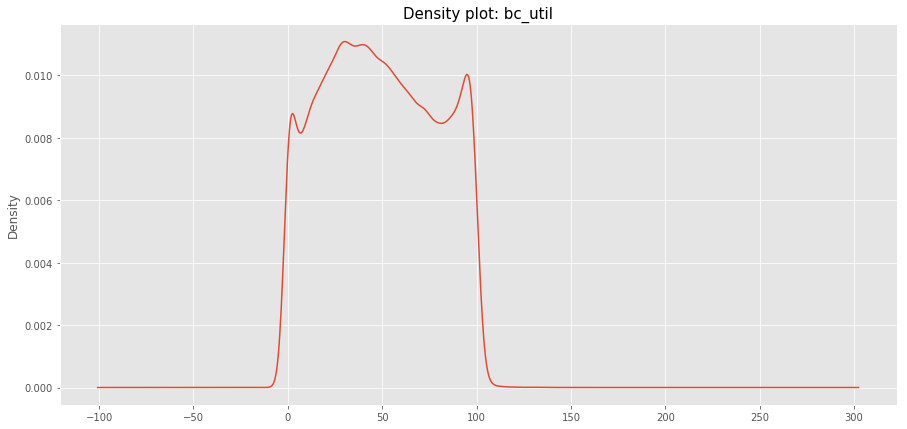

In [52]:
fig = plt.figure(figsize=(15,7))
loan.bc_util.plot(kind = 'density')
plt.title('Density plot: bc_util',fontsize=15)

#### 3.4.7 all_util
- Description: Balance to credit limit on all trades.
- Summary: Few outilers under all_util.

Text(0.5,1,'Box plot: all_util')

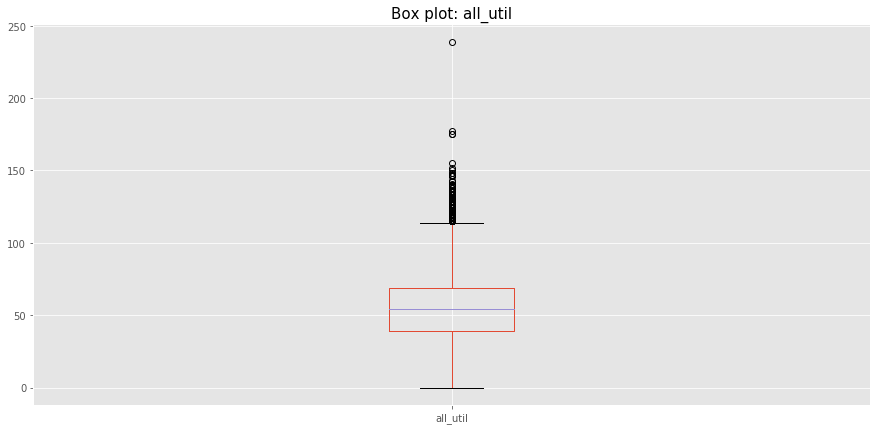

In [53]:
fig = plt.figure(figsize=(15,7))
loan.all_util.plot(kind = 'box')
plt.title('Box plot: all_util',fontsize=15)

Text(0.5,1,'Density plot: all_util')

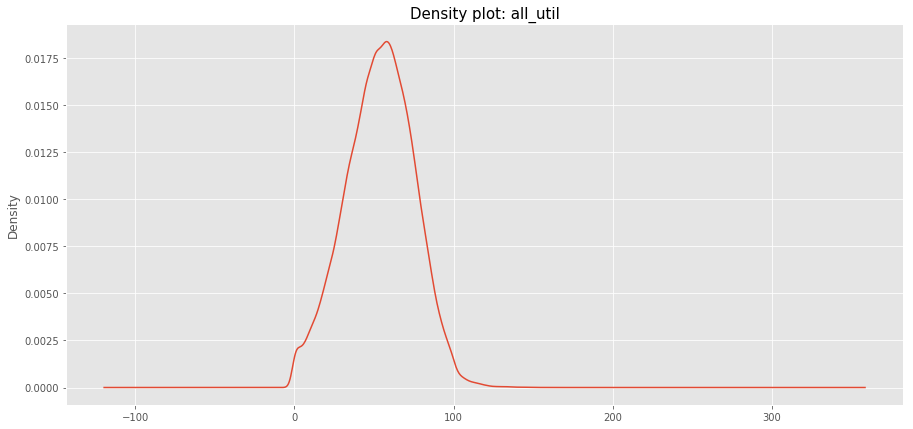

In [54]:
fig = plt.figure(figsize=(15,7))
loan.all_util.plot(kind = 'density')
plt.title('Density plot: all_util',fontsize=15)

#### 3.4.8 open_acc
- Description: The number of open credit lines in the borrower's credit file.
- Summary: Most loan applicants have 7 to 11 opened credit lines.

Text(0.5,1,'Box plot: open_acc')

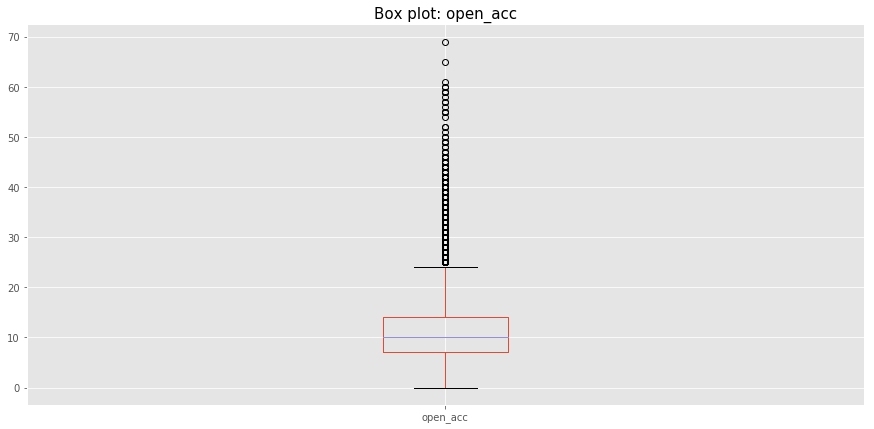

In [55]:
fig = plt.figure(figsize=(15,7))
loan.open_acc.plot(kind = 'box')
plt.title('Box plot: open_acc',fontsize=15)

Text(0.5,1,'Density plot: open_acc')

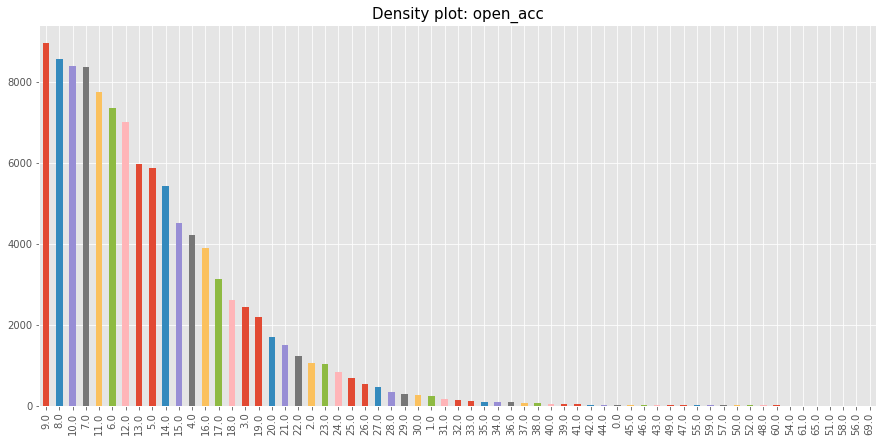

In [56]:
fig = plt.figure(figsize=(15,7))
loan.open_acc.value_counts().plot(kind = 'bar')
plt.title('Density plot: open_acc',fontsize=15)

#### 3.4.9 open_acc_6m
- Description: Number of open trades in last 6 months. 
- Summary: Few outliers under open_acc_6m. Most loan applicants have 0 open trade in last 6 months.

Text(0.5,1,'Box plot: open_acc_6m')

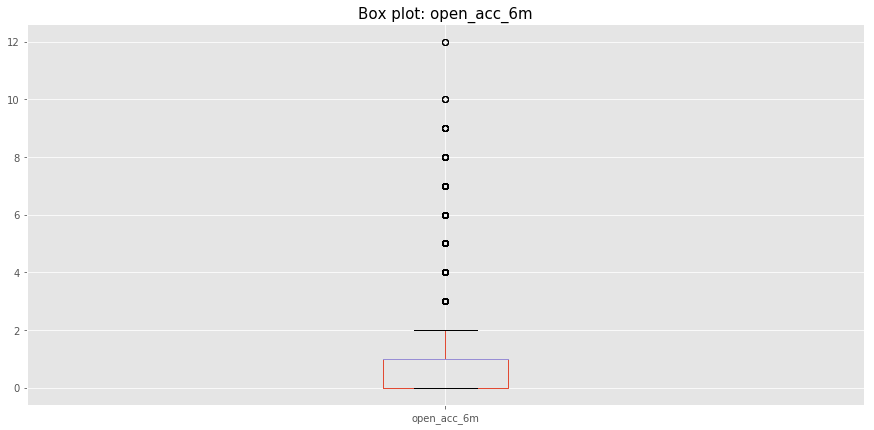

In [57]:
fig = plt.figure(figsize=(15,7))
loan.open_acc_6m.plot(kind = 'box')
plt.title('Box plot: open_acc_6m',fontsize=15)

Text(0.5,1,'Density plot: open_acc_6m')

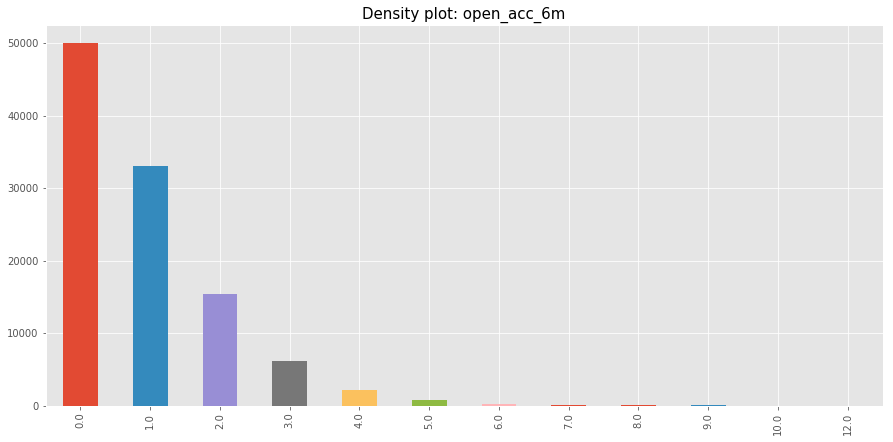

In [58]:
fig = plt.figure(figsize=(15,7))
loan.open_acc_6m.value_counts().plot(kind = 'bar')
plt.title('Density plot: open_acc_6m',fontsize=15)

#### 3.4.10 acc_open_past_24mths
- Description: Number of trades opened in past 24 months.
- Summary: Few outliers under acc_open_past_24mths. Most loan applicants have 1 to 5 open trades in past 24 months.

Text(0.5,1,'Box plot: acc_open_past_24mths')

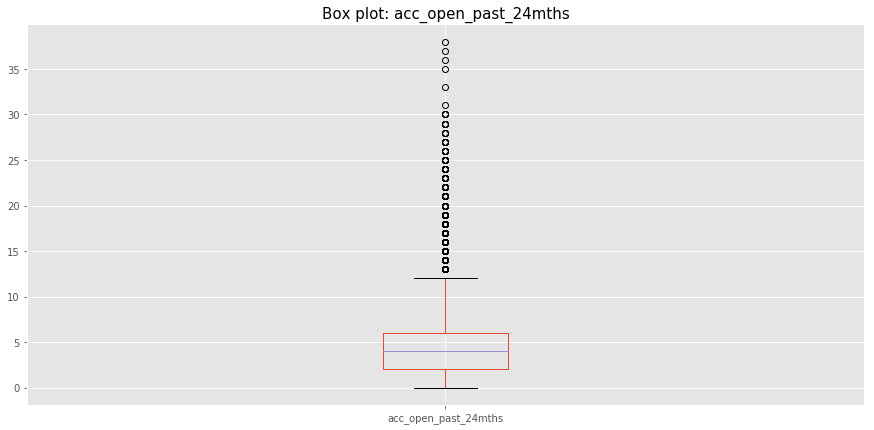

In [59]:
fig = plt.figure(figsize=(15,7))
loan.acc_open_past_24mths.plot(kind = 'box')
plt.title('Box plot: acc_open_past_24mths',fontsize=15)

Text(0.5,1,'Density plot: acc_open_past_24mths')

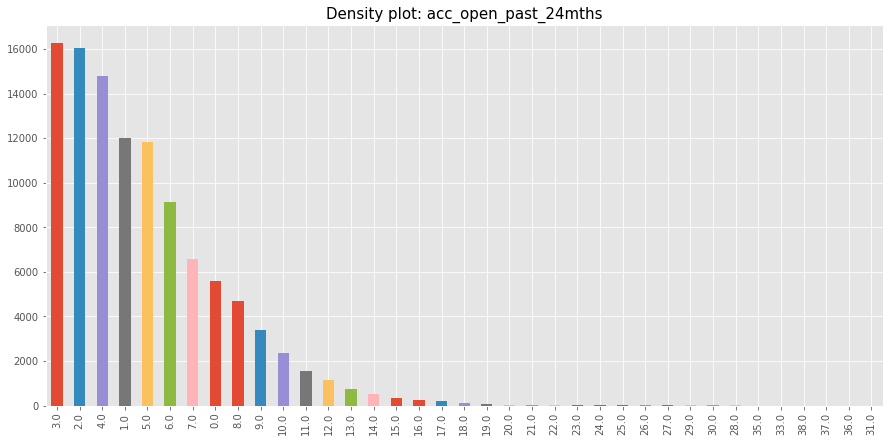

In [60]:
fig = plt.figure(figsize=(15,7))
loan.acc_open_past_24mths.value_counts().plot(kind = 'bar')
plt.title('Density plot: acc_open_past_24mths',fontsize=15)

#### 3.4.11 total_cu_tl
- Description: Number of finance trades.
- Summary: Many outliers under total_cu_tl. Most loan applicants have 0 finance trade.

Text(0.5,1,'Box plot: total_cu_tl')

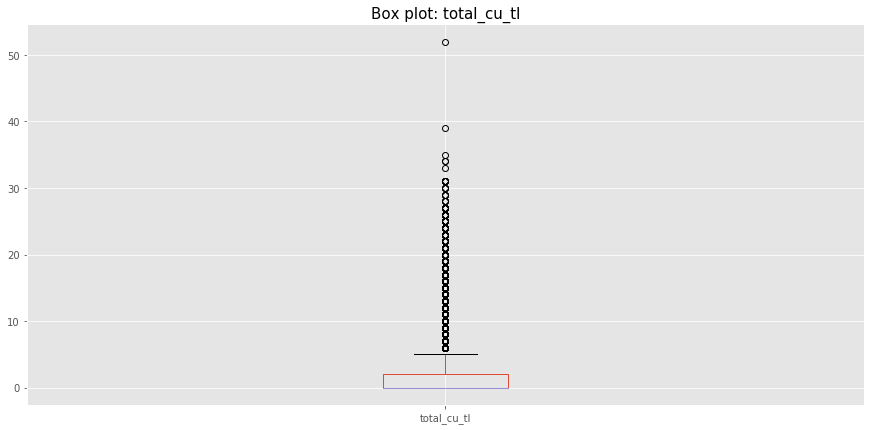

In [61]:
fig = plt.figure(figsize=(15,7))
loan.total_cu_tl.plot(kind = 'box')
plt.title('Box plot: total_cu_tl',fontsize=15)

Text(0.5,1,'Density plot: total_cu_tl')

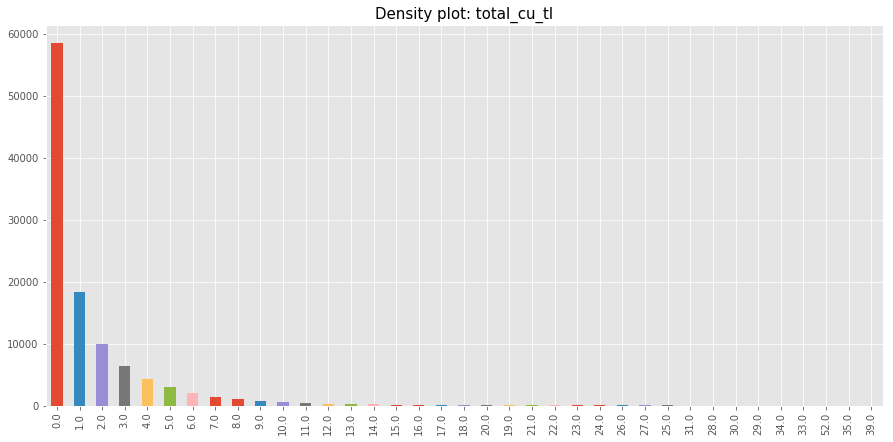

In [62]:
fig = plt.figure(figsize=(15,7))
loan.total_cu_tl.value_counts().plot(kind = 'bar')
plt.title('Density plot: total_cu_tl',fontsize=15)

#### 3.4.12 mths_since_recent_bc
- Description: Months since most recent bankcard account opened.
- Summary: Many outliers and a very skewed distribution.

Text(0.5,1,'Box plot: mths_since_recent_bc')

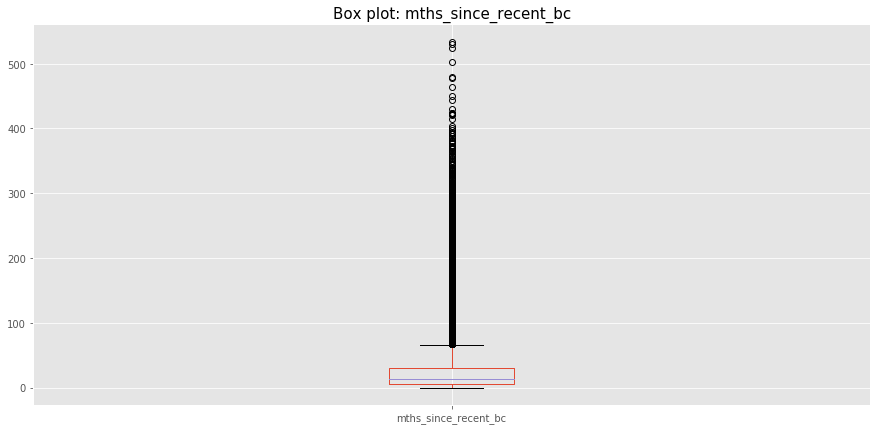

In [63]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_bc',fontsize=15)

Text(0.5,1,'Density plot: mths_since_recent_bc')

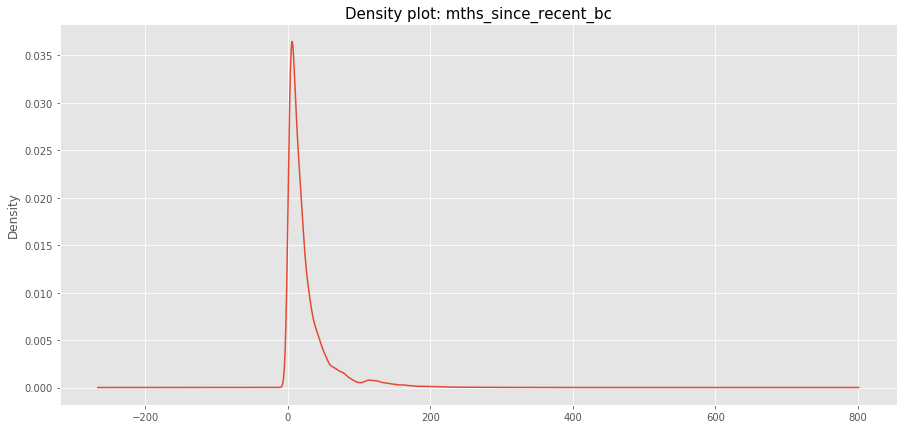

In [64]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc.plot(kind = 'density')
plt.title('Density plot: mths_since_recent_bc',fontsize=15)

#### 3.4.13 mths_since_recent_bc_dlq
- Description: Months since most recent bankcard delinquency.
- Summary: Many outliers under mths_since_recent_bc_dlq.

Text(0.5,1,'Box plot: mths_since_recent_bc_dlq')

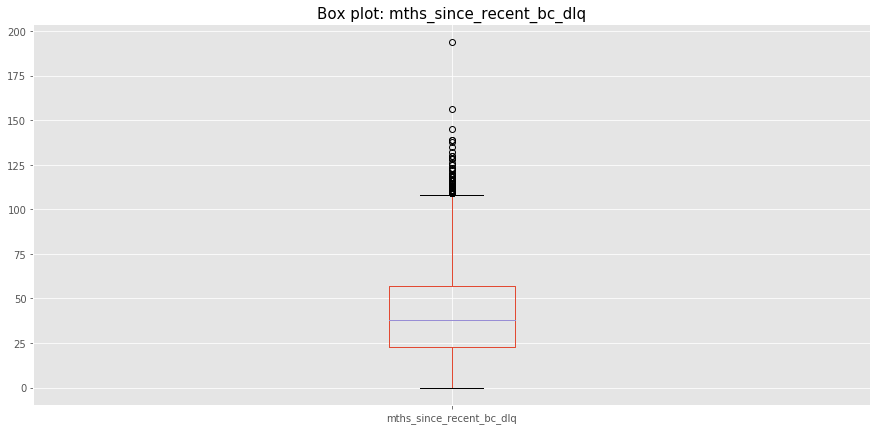

In [65]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc_dlq.plot(kind = 'box')
plt.title('Box plot: mths_since_recent_bc_dlq',fontsize=15)

Text(0.5,1,'Density plot: mths_since_recent_bc_dlq')

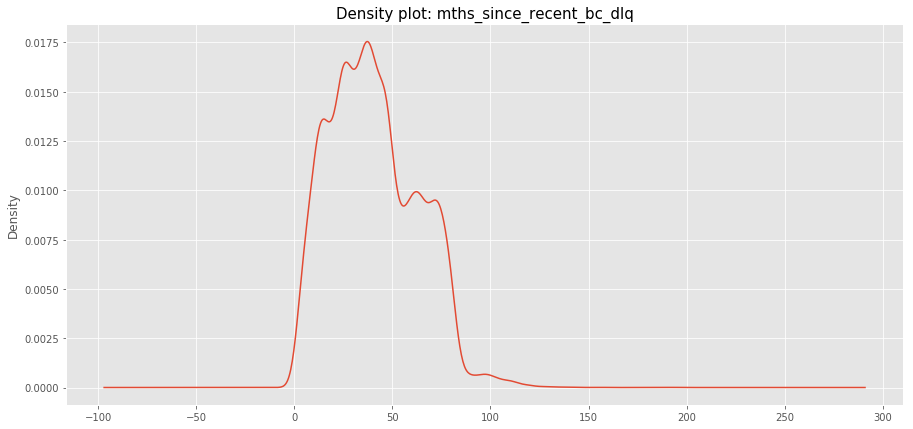

In [66]:
fig = plt.figure(figsize=(15,7))
loan.mths_since_recent_bc_dlq.plot(kind = 'density')
plt.title('Density plot: mths_since_recent_bc_dlq',fontsize=15)

#### 3.4.14 num_accts_ever_120_pd
- Description: Number of accounts ever 120 or more days past due.
- Summary: Many outliers under num_accts_ever_120_pd. Most loan applicants have no account ever 120 or more days past due.

Text(0.5,1,'Box plot: num_accts_ever_120_pd')

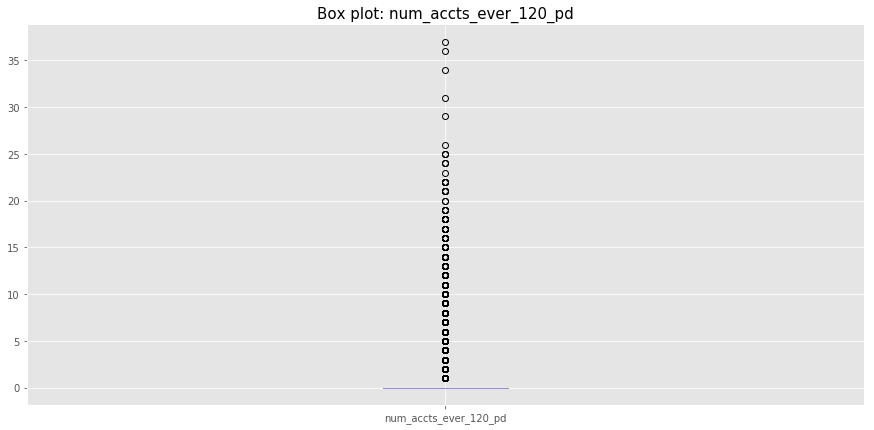

In [67]:
fig = plt.figure(figsize=(15,7))
loan.num_accts_ever_120_pd.plot(kind = 'box')
plt.title('Box plot: num_accts_ever_120_pd',fontsize=15)

Text(0.5,1,'Density plot: num_accts_ever_120_pd')

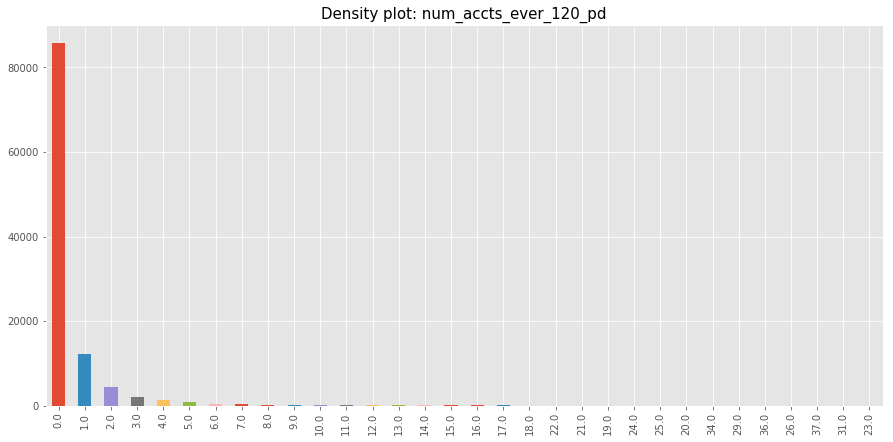

In [68]:
fig = plt.figure(figsize=(15,7))
loan.num_accts_ever_120_pd.value_counts().plot(kind = 'bar')
plt.title('Density plot: num_accts_ever_120_pd',fontsize=15)

#### 3.4.15 num_actv_bc_tl
- Description: Number of currently active bankcard accounts.
- Summary: Few outliers under num_actv_bc_tl. Most loan applicants have 1 to 5 active bankcard accounts.

Text(0.5,1,'Box plot: num_actv_bc_tl')

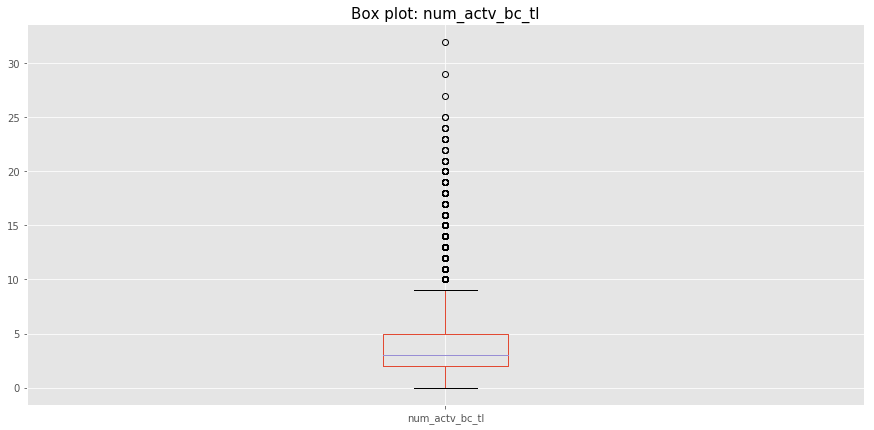

In [69]:
fig = plt.figure(figsize=(15,7))
loan.num_actv_bc_tl.plot(kind = 'box')
plt.title('Box plot: num_actv_bc_tl',fontsize=15)

Text(0.5,1,'Density plot: num_actv_bc_tl')

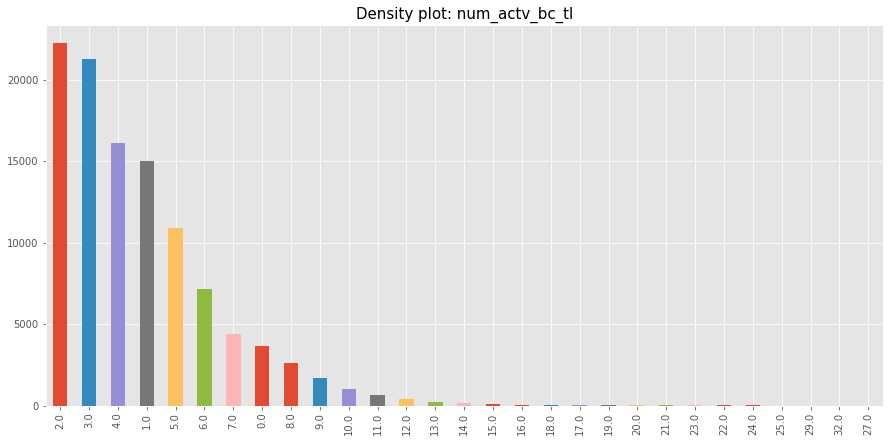

In [70]:
fig = plt.figure(figsize=(15,7))
loan.num_actv_bc_tl.value_counts().plot(kind = 'bar')
plt.title('Density plot: num_actv_bc_tl',fontsize=15)

#### 3.4.16 num_bc_sats
- Description: Number of satisfactory bankcard accounts.
- Summary: Few outliers under num_actv_bc_tl. Most loan applicants have 2 to 6 satisfactory bankcard accounts.

Text(0.5,1,'Box plot: num_bc_sats')

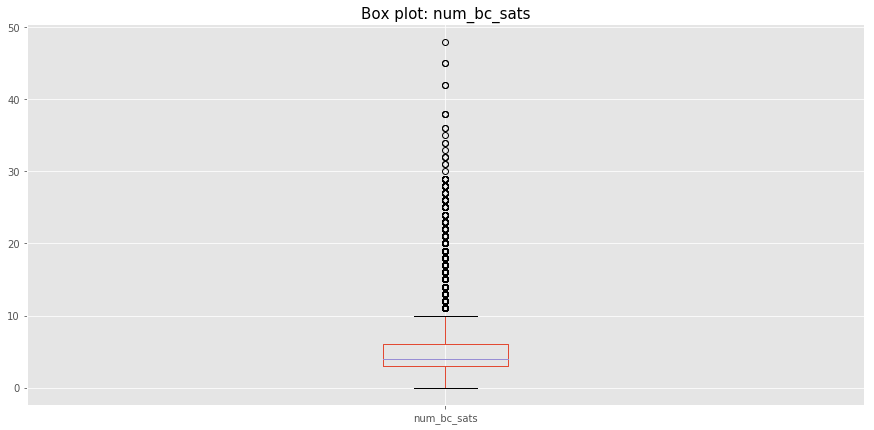

In [71]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_sats.plot(kind = 'box')
plt.title('Box plot: num_bc_sats',fontsize=15)

Text(0.5,1,'Density plot: num_bc_sats')

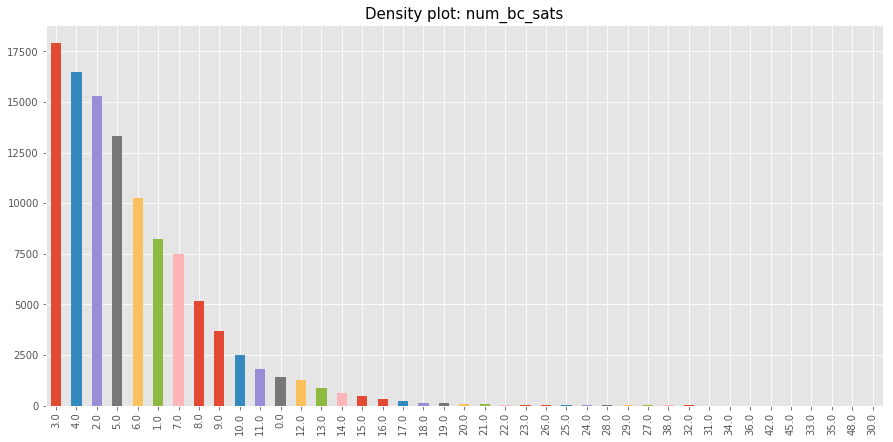

In [72]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_sats.value_counts().plot(kind = 'bar')
plt.title('Density plot: num_bc_sats',fontsize=15)

#### 3.4.17 num_bc_tl
- Description: Number of bankcard accounts.
- Summary: Many outliers under num_actv_bc_tl. Most loan applicants have 3 to 7 bankcard accounts.

Text(0.5,1,'Box plot: num_bc_tl')

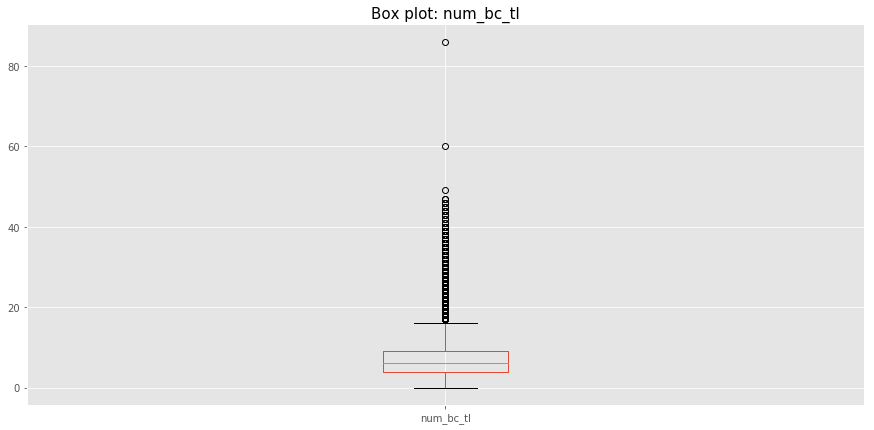

In [73]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_tl.plot(kind = 'box')
plt.title('Box plot: num_bc_tl',fontsize=15)

Text(0.5,1,'Density plot: num_bc_tl')

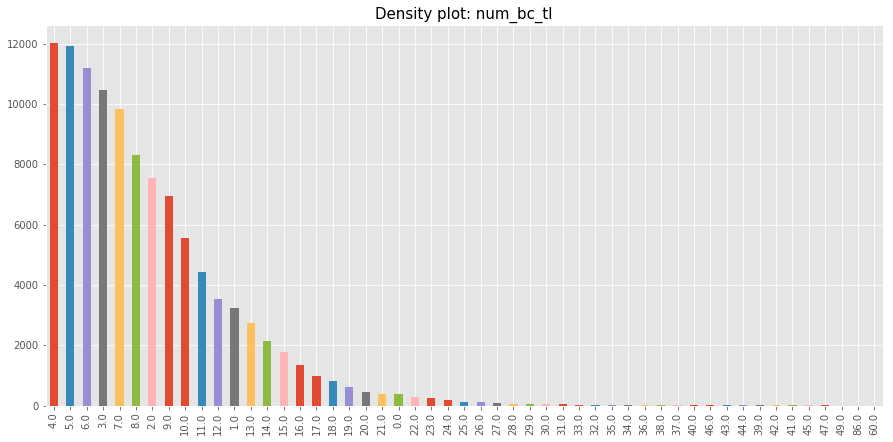

In [74]:
fig = plt.figure(figsize=(15,7))
loan.num_bc_tl.value_counts().plot(kind = 'bar')
plt.title('Density plot: num_bc_tl',fontsize=15)

#### 3.4.18 num_sats
- Description: Number of satisfactory accounts.
- Summary: Many outliers under num_sats.

Text(0.5,1,'Box plot: num_sats')

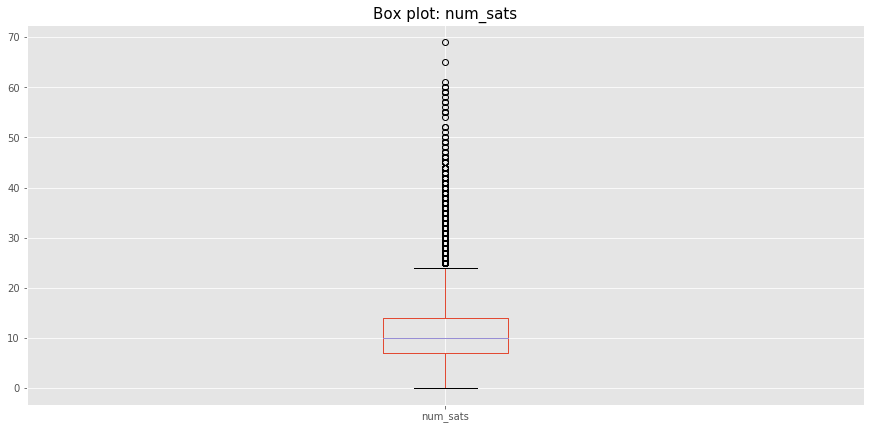

In [75]:
fig = plt.figure(figsize=(15,7))
loan.num_sats.plot(kind = 'box')
plt.title('Box plot: num_sats',fontsize=15)

Text(0.5,1,'Density plot: num_sats')

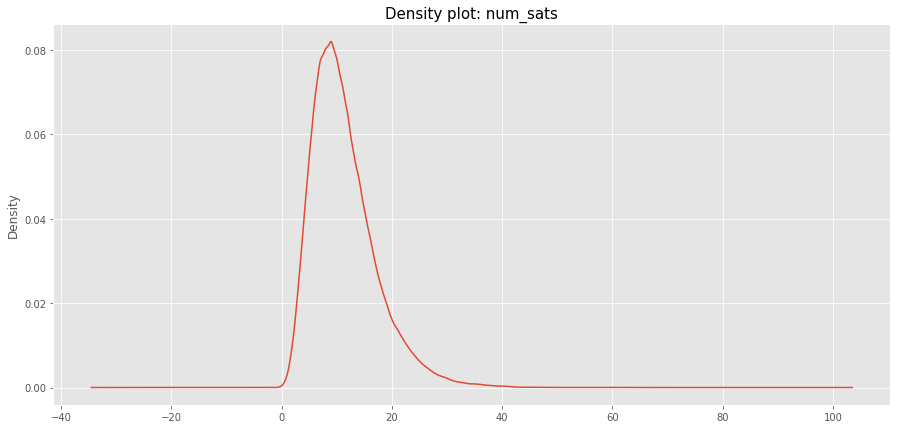

In [76]:
fig = plt.figure(figsize=(15,7))
loan.num_sats.plot(kind = 'density')
plt.title('Density plot: num_sats',fontsize=15)

#### 3.4.19 num_tl_120dpd_2m
- Description: Number of accounts currently 120 days past due (updated in past 2 months).
- Summary: Nearly all loan applicatns have 0 account currently 120 days past due.

Text(0.5,1,'Box plot: num_tl_120dpd_2m')

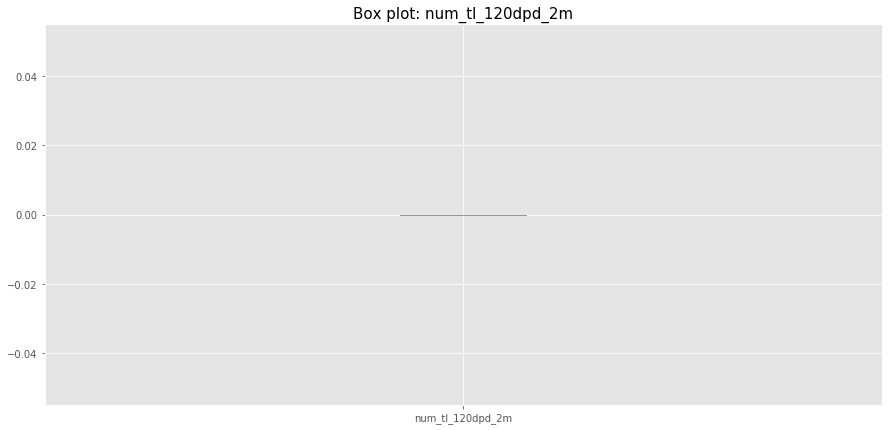

In [77]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_120dpd_2m.plot(kind = 'box')
plt.title('Box plot: num_tl_120dpd_2m',fontsize=15)

In [78]:
round(sum(loan.num_tl_120dpd_2m == 0) / loan.shape[0], 4)

0.9675

#### 3.4.20 num_tl_30dpd
- Description: Number of accounts currently 30 days past due (updated in past 2 months).
- Summary: Nearly all loan applicatns have 0 account currently 30 days past due.

Text(0.5,1,'Box plot: num_tl_30dpd')

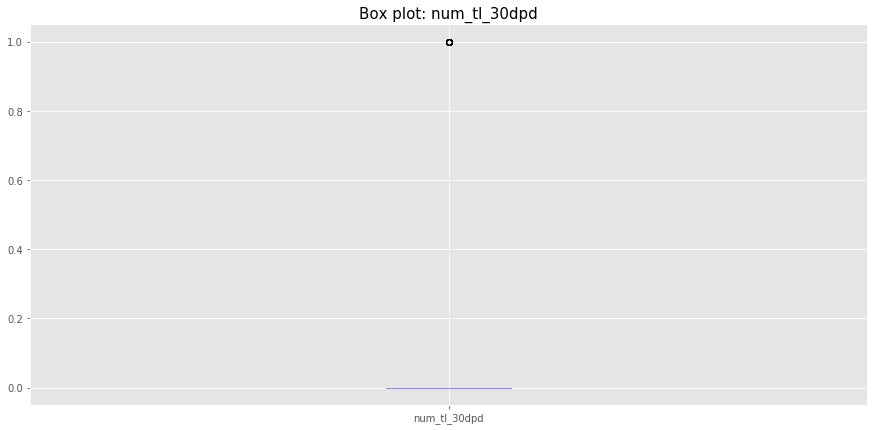

In [79]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_30dpd.plot(kind = 'box')
plt.title('Box plot: num_tl_30dpd',fontsize=15)

In [80]:
print(round(sum(loan.num_tl_30dpd == 0) / loan.shape[0], 4))
print(sum(loan.num_tl_30dpd != 0))

0.9998
23


#### 3.4.21 num_tl_90g_dpd_24m
- Description: Number of accounts 90 or more days past due in last 24 months.
- Summary: Nearly all loan applicatns have 0 account 90 or more days past due in last 24 months.

Text(0.5,1,'Box plot: num_tl_90g_dpd_24m')

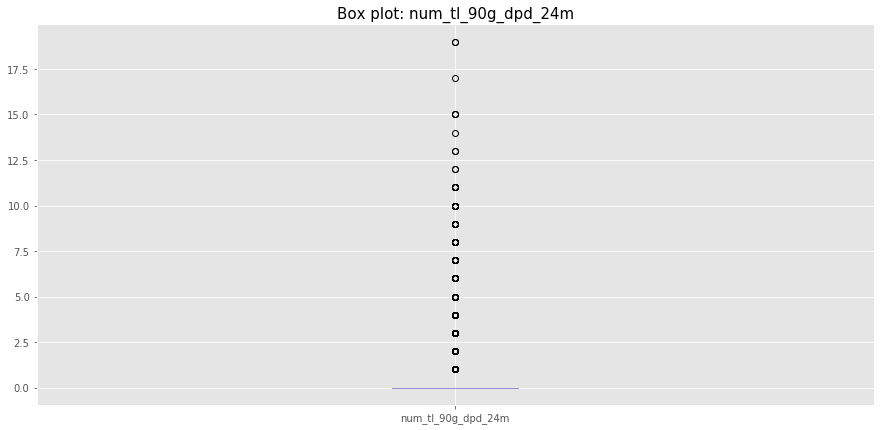

In [81]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_90g_dpd_24m.plot(kind = 'box')
plt.title('Box plot: num_tl_90g_dpd_24m',fontsize=15)

In [82]:
print(round(sum(loan.num_tl_90g_dpd_24m == 0) / loan.shape[0], 4))
print(sum(loan.num_tl_90g_dpd_24m != 0))

0.9607
4241


#### 3.4.22 num_tl_op_past_12m
- Description: Number of accounts opened in past 12 months.
- Summary: A fourth of all loan applicants have one account opened in past 12 months.

Text(0.5,1,'Box plot: num_tl_op_past_12m')

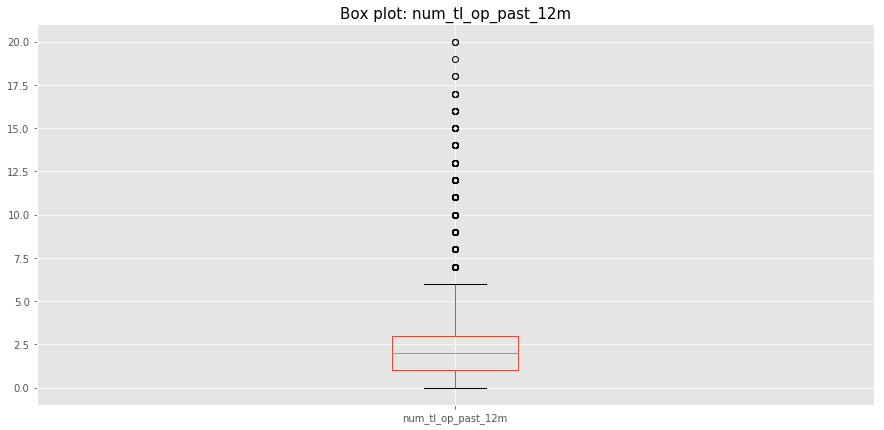

In [83]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_op_past_12m.plot(kind = 'box')
plt.title('Box plot: num_tl_op_past_12m',fontsize=15)

Text(0.5,1,'Density plot: num_tl_op_past_12m')

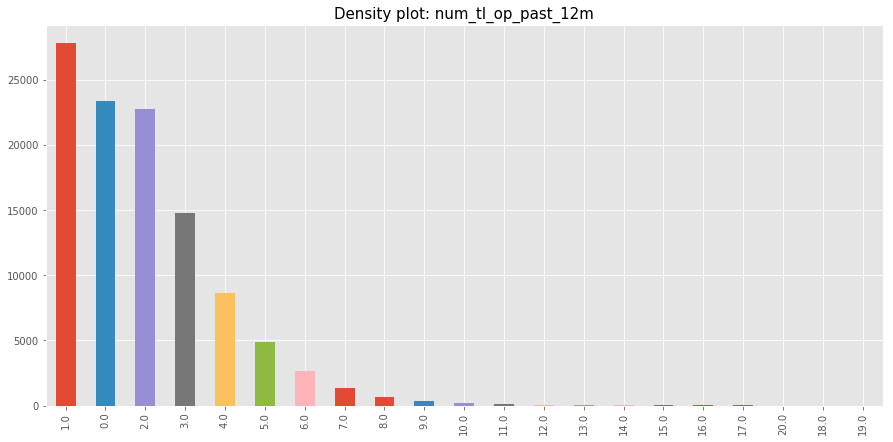

In [84]:
fig = plt.figure(figsize=(15,7))
loan.num_tl_op_past_12m.value_counts().plot(kind = 'bar')
plt.title('Density plot: num_tl_op_past_12m',fontsize=15)

#### 3.4.23 percent_bc_gt_75
- Description: Percentage of all bankcard accounts > 75% of limit.
- Summary: Most loan applicants have 0% of all bankcard accounts > 75% of limit.

Text(0.5,1,'Box plot: percent_bc_gt_75')

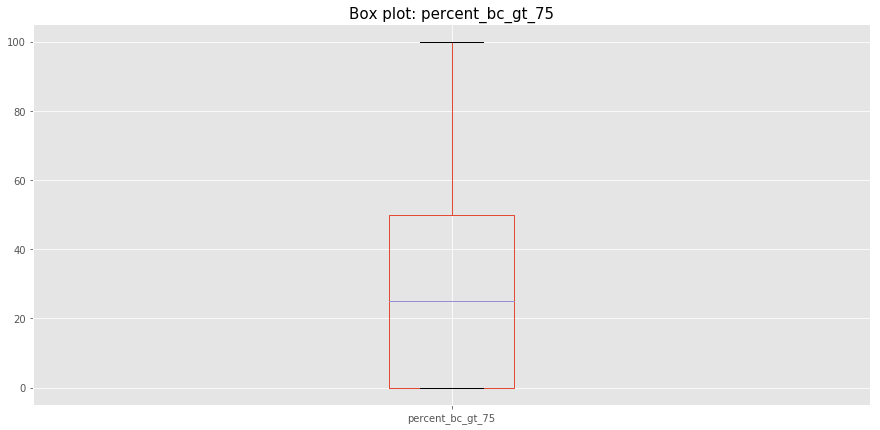

In [85]:
fig = plt.figure(figsize=(15,7))
loan.percent_bc_gt_75.plot(kind = 'box')
plt.title('Box plot: percent_bc_gt_75',fontsize=15)

Text(0.5,1,'Density plot: percent_bc_gt_75')

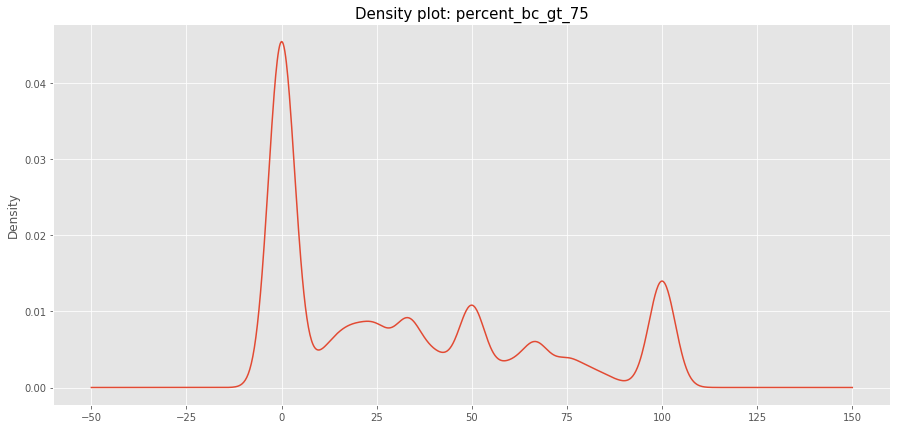

In [86]:
fig = plt.figure(figsize=(15,7))
loan.percent_bc_gt_75.plot(kind = 'density')
plt.title('Density plot: percent_bc_gt_75',fontsize=15)

#### 3.4.24 tax_liens
- Description: Number of tax liens.
- Summary: Most loan applicants have 0 tax lien.

Text(0.5,1,'Box plot: tax_liens')

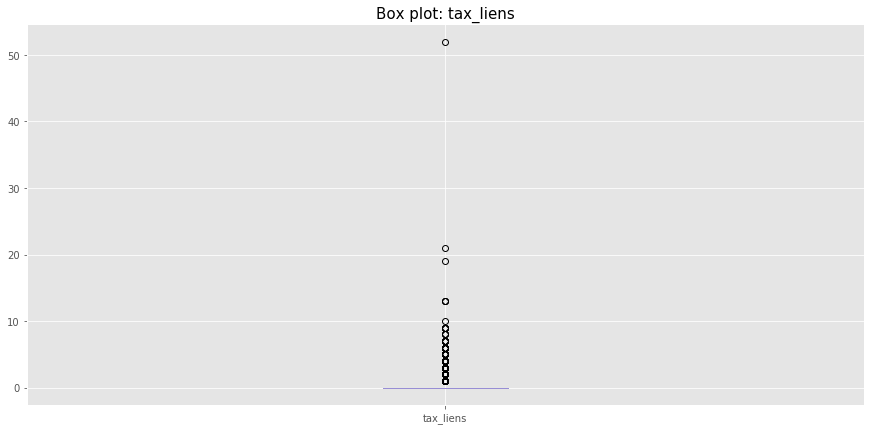

In [87]:
fig = plt.figure(figsize=(15,7))
loan.tax_liens.plot(kind = 'box')
plt.title('Box plot: tax_liens',fontsize=15)

In [88]:
round(sum(loan.tax_liens == 0) / loan.shape[0], 4)

0.9758

#### 3.4.25 tot_hi_cred_lim
- Description: Total high credit/credit limit.
- Summary: Many outliers and a very skewed distribution under tot_hi_cred_lim.

Text(0.5,1,'Box plot: tot_hi_cred_lim')

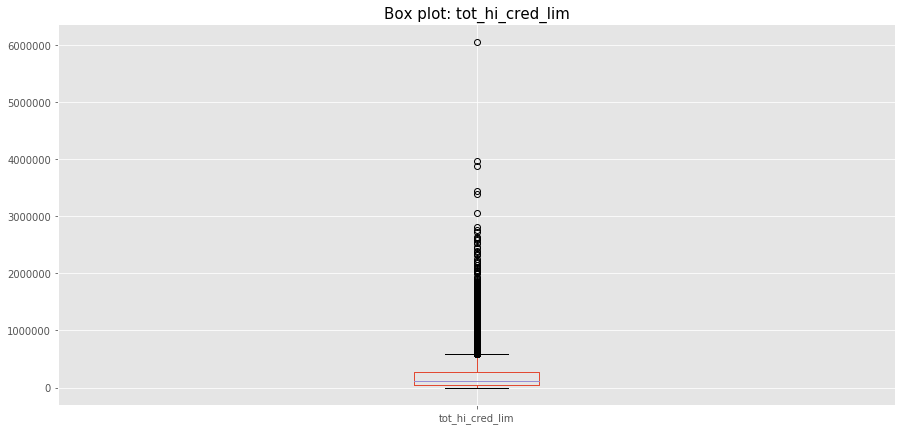

In [89]:
fig = plt.figure(figsize=(15,7))
loan.tot_hi_cred_lim.plot(kind = 'box')
plt.title('Box plot: tot_hi_cred_lim',fontsize=15)

Text(0.5,1,'Density plot: tot_hi_cred_lim')

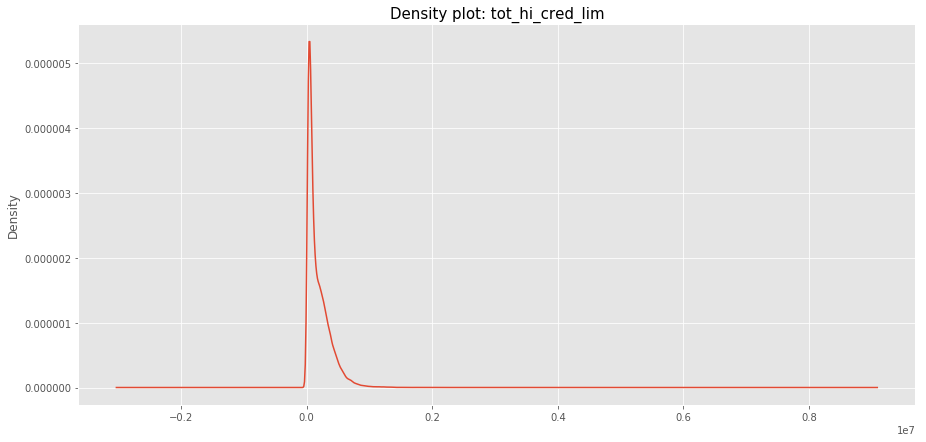

In [90]:
fig = plt.figure(figsize=(15,7))
loan.tot_hi_cred_lim.plot(kind = 'density')
plt.title('Density plot: tot_hi_cred_lim',fontsize=15)

#### 3.4.26 total_bal_ex_mort
- Description: Total credit balance excluding mortgage.
- Summary: Many outliers and a very skewed distribution under total_bal_ex_mort.

Text(0.5,1,'Box plot: total_bal_ex_mort')

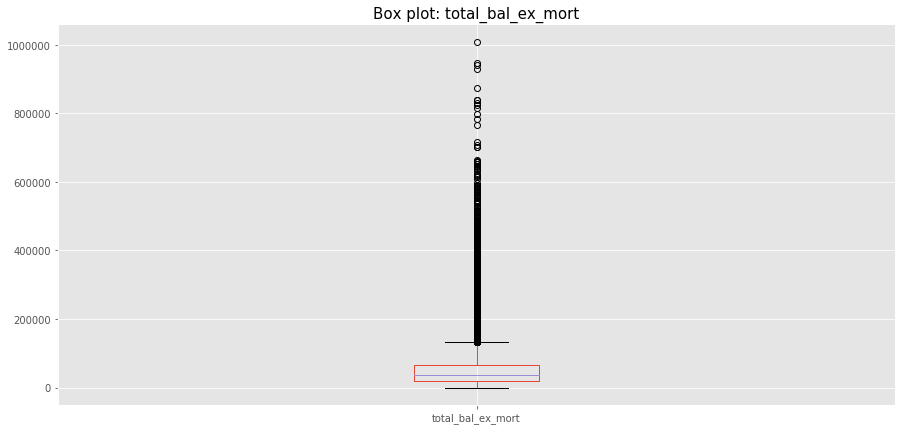

In [91]:
fig = plt.figure(figsize=(15,7))
loan.total_bal_ex_mort.plot(kind = 'box')
plt.title('Box plot: total_bal_ex_mort',fontsize=15)

Text(0.5,1,'Density plot: total_bal_ex_mort')

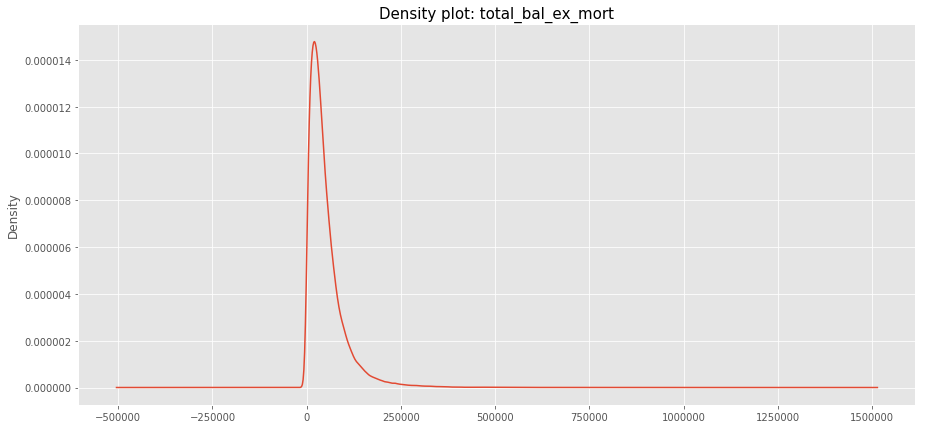

In [92]:
fig = plt.figure(figsize=(15,7))
loan.total_bal_ex_mort.plot(kind = 'density')
plt.title('Density plot: total_bal_ex_mort',fontsize=15)

#### 3.4.27 total_bc_limit
- Description: Total bankcard high credit/credit limit.
- Summary: Many outliers and a very skewed distribution under total_bc_limit.

Text(0.5,1,'Box plot: total_bc_limit')

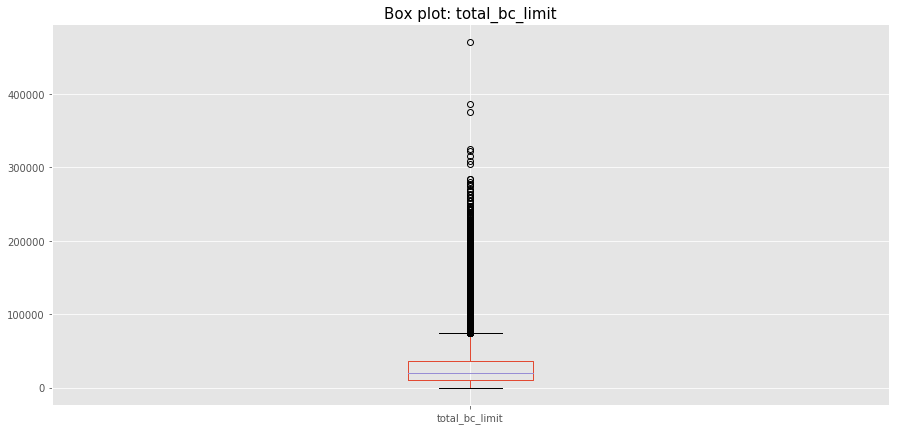

In [93]:
fig = plt.figure(figsize=(15,7))
loan.total_bc_limit.plot(kind = 'box')
plt.title('Box plot: total_bc_limit',fontsize=15)

Text(0.5,1,'Density plot: total_bc_limit')

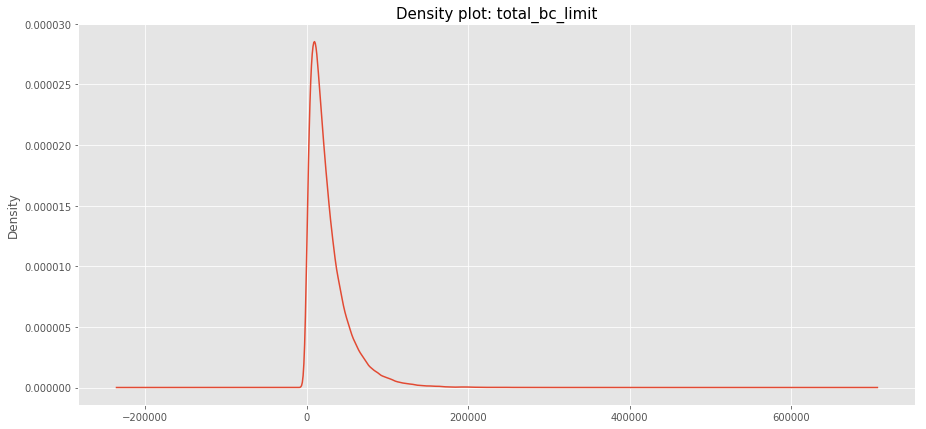

In [94]:
fig = plt.figure(figsize=(15,7))
loan.total_bc_limit.plot(kind = 'density')
plt.title('Density plot: total_bc_limit',fontsize=15)

## In total, 145 features in this dataset
- Demonstrate more meaningful visualizations in next ipynb file (Feature Preprocessing & Selection).

## Data understanding
1. Some NA values under date type columns, why?
    - issue_d
    - last_pymnt_d
    - next_pymnt_d

In [ ]:
# Some NA values found
print(loan['issue_d'].isnull().sum())

# 151 NA values are under last_pymnt_d
print(loan['last_pymnt_d'].isnull().sum())

# 6517, nearly 6% of data are NA values under next_pymnt_d
print(loan['next_pymnt_d'].isnull().sum())

In [ ]:
# All NA values under last_pymnt_d have loan_status "Charged Off" or "Late (31-120 days)"
loan[loan['last_pymnt_d'].isnull()]['loan_status'].value_counts()

In [ ]:
# All NA values under last_pymnt_d have last_pymnt_amnt "0"
loan[loan['last_pymnt_d'].isnull()]['last_pymnt_amnt'].describe()

In [ ]:
# All NA values under next_pymnt_d have loan_status "Fully Paid" or "Charged Off"
# This explain why there are NA values under next_pymnt_d
loan[loan['next_pymnt_d'].isnull()]['loan_status'].value_counts()

In [ ]:
# Extract non-NA values under both last_pymnt_d & next_pymnt_d
# and see the distribution of loan_status (4 levels)
# "Fully Paid" & "Charged Off" levels are not included after the extraction
loan[['last_pymnt_d','next_pymnt_d','loan_status']].dropna()['loan_status'].value_counts()

In [ ]:
# Originally, we have 6 levels
loan.loan_status.value_counts()

## Conclusion on NA values under last_pymnt_d & next_pymnt_d
1. last_pymnt_d: NA values under last_pymnt_d indicate that loan applications is either Charged Off or Late (31-120 days).
2. next_pymnt_d: NA values under next_pymnt_d indicate that loan applications is either Fully Paid or Charged Off. For next_pymnt_d, it might cause a quasi complete separation on loan status. We need to further do an experiment on it and decide whether to drop these NA values from the experiment result.

## Deal with date-time type columns
1. Many date-time type columns in the dataset. It's more reasonable to use this type of data transformed by the day difference between itself and issue day or transformed by the day difference between itself and a benchmark date.
2. We are not sure whether the day difference is a great feature to explain a linear relationship with loan status (requires a linear assumption). We can also further do grouping on day difference values by bins (create a categorical type of feature). 
3. Use f_regression (t-test & chisquare test) function to see a feature's significance.
4. Date-time type columns
    - issue_d (days_since_issue, O), last_pymnt_d (numerical & categorical, O) , next_pymnt_d (numerical & categorical, O) 
    - earliest_cr_line (days_between_max_issue_earliest_cr_line, O), last_credit_pull_d (days_since_last_credit_pull, O)
    - payment_plan_start_date (O), hardship_start_date (O), hardship_end_date (O)
    - debt_settlement_flag_date (O), settlement_date (O)

#### (1) Deal with last_pymnt_d

In [ ]:
# Add a new column T_issue_d (T means transformation) 
loan['T_issue_d'] = pd.to_datetime(loan.issue_d)

In [ ]:
# Drop issue_d
print(loan.shape)
loan = loan.drop('issue_d', axis = 1)
print(loan.shape)

In [ ]:
# Add a new column T_last_pymnt_d
loan['T_last_pymnt_d'] = pd.to_datetime(loan.last_pymnt_d)

In [ ]:
# Drop last_pymnt_d
print(loan.shape)
loan = loan.drop('last_pymnt_d', axis = 1)
print(loan.shape)

In [ ]:
# Add a new column Diff_last_issue_d, the day difference between T_last_pymnt_d & T_issue_d
loan['Diff_last_issue_d'] = loan['T_last_pymnt_d'] - loan['T_issue_d']
print(loan.shape)

In [ ]:
print(len(loan['Diff_last_issue_d'].value_counts()), 'levels.')

loan['Diff_last_issue_d'].value_counts()

In [ ]:
# Transform date type data into float type data
diff_last_issue_d = []
for i in range(0, len(loan['Diff_last_issue_d'])):
    diff_last_issue_d.append(loan['Diff_last_issue_d'][i].days)

In [ ]:
# We found that the minimum day difference is 0, which indicates a loan application might be fully paid
# at the same time when a loan is applied 
print('The minimum day difference between last payment day and issue day is', min(diff_last_issue_d))
print('The maximum day difference between last payment day and issue day is', max(diff_last_issue_d))

In [ ]:
# Because we already knew that last_pymnt_d has 151 NA values
# Substitute NA values with 99999 to indicate they are NA values 
# If we don't do the substitution, doing level assignment later in a for loop will have a problem
for i in range(0, len(diff_last_issue_d)):
    if diff_last_issue_d[i] == np.nan:
        diff_last_issue_d[i] = 99999

In [ ]:
# The difference between each level is around 3 months
# We will have 10 levels (categorical feature)
level_diff_last_issue_d = []
for each in diff_last_issue_d:  
    if each <= 0:
        level_diff_last_issue_d.append('0 difference')
    elif (each > 0) and (each <= 31):
        level_diff_last_issue_d.append('1 month difference')
    elif (each > 31) and (each <= 61):
        level_diff_last_issue_d.append('2 month difference')
    elif (each > 61) and (each <= 92):
        level_diff_last_issue_d.append('3 month difference')
    elif (each > 92) and (each <= 122):
        level_diff_last_issue_d.append('4 month difference')
    elif (each > 122) and (each <= 151):
        level_diff_last_issue_d.append('5 month difference')
    elif (each > 151) and (each <= 181):
        level_diff_last_issue_d.append('6 month difference')
    elif (each > 181) and (each < 99999):
        level_diff_last_issue_d.append('More than 6 month difference')    
    else:
        level_diff_last_issue_d.append('NA month difference') 

In [ ]:
set(level_diff_last_issue_d)

In [ ]:
# Hand-created feature I: numerical day difference between last payment day and issue day
loan['numeric_diff_last_issue_d'] = diff_last_issue_d

# Hand-created feature II: categorical day difference in levels between last payment day and issue day
loan['level_diff_last_issue_d'] = level_diff_last_issue_d

In [ ]:
loan = loan.drop('Diff_last_issue_d', axis = 1)

In [ ]:
print(loan.shape)

In [ ]:
loan['level_diff_last_issue_d'].value_counts()

In [ ]:
# With a small month difference, loan_status is more likely to be "Fully Paid" or "Charged Off"
# With a large month difference (means closer to the current date), loan_status is more likely to be "Current"
loan.groupby(['level_diff_last_issue_d', 'loan_status']).size()

In [ ]:
# Convert loan_status into binary values
# 1 means a loan_status is either Fully Paid or Current
# 0 means the rest values of loan_status 
loan_status_binary = [1 if each in ['Fully Paid', 'Current'] else 0 for each in loan.loan_status.values]

# double-check
print(len(loan_status_binary))

In [ ]:
# Response variable: loan_status_binary
loan['loan_status_binary'] = loan_status_binary

# Don't need loan_status
loan = loan.drop('loan_status', axis = 1)
print(loan.shape)

In [ ]:
# Most of loan applications labeled with 1 (either Fully Paid or Current)
loan['loan_status_binary'].value_counts() / loan.shape[0]

In [ ]:
# To see whether the hand-created feature "level_diff_last_issue_d" has a prediction power or not
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression

model = LogisticRegression()
model.fit(pd.get_dummies(loan['level_diff_last_issue_d']), loan['loan_status_binary'])

In [ ]:
# Look up the training score using level_diff_last_issue_d variable
model.score(pd.get_dummies(loan['level_diff_last_issue_d']), loan['loan_status_binary'])

In [ ]:
# Coefficient for each dummy variable 
# Results of coefficient correspond with our initial hypothesis that 
# for a month difference as 0, 4, 5, and 6, loan_status_binary is more likely to be 1,
# and for a month difference as 1, 2, 3, or NA, loan_status_binary is more likely to be 0
for i, j in zip(pd.get_dummies(loan['level_diff_last_issue_d']).columns, model.coef_[0]):
    print(i, j)

In [ ]:
# Feature significance using f_regression function
print(f_regression(pd.get_dummies(loan['level_diff_last_issue_d']), loan['loan_status_binary'])[1])
print(f_regression(pd.get_dummies(loan['level_diff_last_issue_d']), loan['loan_status_binary'])[1] < 0.05)
print(f_regression(pd.get_dummies(loan['level_diff_last_issue_d']), loan['loan_status_binary'])[1] < 0.01)

In [ ]:
# To see whether the hand-created feature "numeric_diff_last_issue_d" has a prediction power or not
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import Imputer

# Need to do NA imputation since Logistic regression can't handle missing values
impu = Imputer(missing_values='NaN', strategy='median', axis=0)

impu.fit(loan['numeric_diff_last_issue_d'].values.reshape(-1, 1))
train = impu.transform(loan['numeric_diff_last_issue_d'].values.reshape(-1, 1))

In [ ]:
model = LogisticRegression()
model.fit(train, loan['loan_status_binary'])

In [ ]:
# Look up the training score using level_diff_last_issue_d variable
model.score(train, loan['loan_status_binary'])

In [ ]:
# Coefficient
# Results of coefficient correspond with our hypothesis that as long as day difference is increased,
# the loan status is either Fully Paid or Current
model.coef_

In [ ]:
print(f_regression(train, loan['loan_status_binary'])[1])
print(f_regression(train, loan['loan_status_binary'])[1] < 0.05)
print(f_regression(train, loan['loan_status_binary'])[1] < 0.01)

## Conclusion on hand-created features, level_diff_last_issue_d & numeric_diff_last_issue_d
- Both hand-created features have p-value less than 0.01, we can consider them as features having great prediction power  on our response variable.
- But, we might consider to drop levels NA month difference & 0 difference under level_diff_last_issue_d as decision rules in the model.

#### (2) Deal with next_pymnt_d

In [ ]:
loan['T_next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'])

# Drop next_pymnt_d
print(loan.shape)
loan = loan.drop('next_pymnt_d', axis = 1)
print(loan.shape)

In [ ]:
# Add a new column Diff_next_issue_d, the day difference between T_next_pymnt_d & T_issue_d
loan['Diff_next_issue_d'] = loan['T_next_pymnt_d'] - loan['T_issue_d']
print(loan.shape)

In [ ]:
print(len(loan['Diff_next_issue_d'].value_counts()), 'levels.')

loan['Diff_next_issue_d'].value_counts()

In [ ]:
# Transform date type data into float type data
diff_next_issue_d = []
for i in range(0, len(loan['Diff_next_issue_d'])):
    diff_next_issue_d.append(loan['Diff_next_issue_d'][i].days)

In [ ]:
# Note that we have NA values under diff_next_issue_d (originally from next_pymnt_d)
set(diff_next_issue_d)

In [ ]:
# We found that the minimum day difference is 122 and the maximum day difference is 243 (indicate a quarter cycle)
print('The minimum day difference between last payment day and issue day is', min(diff_next_issue_d))
print('The maximum day difference between last payment day and issue day is', max(diff_next_issue_d))

In [ ]:
# Because we already knew that last_pymnt_d has 6517 NA values
# Substitute NA values with 99999 to indicate they are NA values 
# If we don't do the substitution, doing level assignment later in a for loop will have a problem
for i in range(0, len(diff_next_issue_d)):
    if diff_next_issue_d[i] == np.nan:
        diff_next_issue_d[i] = 99999

In [ ]:
# The difference between each level is around 3 months
# We will have 10 levels (categorical feature)
level_diff_next_issue_d = []
for each in diff_next_issue_d:  
    if each <= 122:
        level_diff_next_issue_d.append('4 month difference')
    elif (each > 122) and (each <= 153):
        level_diff_next_issue_d.append('5 month difference')
    elif (each > 153) and (each <= 184):
        level_diff_next_issue_d.append('6 month difference')
    elif (each > 184) and (each <= 212):
        level_diff_next_issue_d.append('7 month difference')
    elif (each > 212) and (each <= 243):
        level_diff_next_issue_d.append('8 month difference')
    elif (each > 243) and (each < 99999):
        level_diff_next_issue_d.append('More than 8 month difference')    
    else:
        level_diff_next_issue_d.append('NA month difference') 

In [ ]:
set(level_diff_next_issue_d)

In [ ]:
# Hand-created feature I: numerical day difference between next payment day and issue day
loan['numeric_diff_next_issue_d'] = diff_next_issue_d

# Hand-created feature II: categorical day difference in levels between next payment day and issue day
loan['level_diff_next_issue_d'] = level_diff_next_issue_d

In [ ]:
loan = loan.drop('Diff_next_issue_d', axis = 1)
print(loan.shape)

In [ ]:
# Most level_diff_next_issue_d are between 5 and 7 month difference
loan['level_diff_next_issue_d'].value_counts()

In [ ]:
# loan_status_binary is more likely to be 1 whatever the month difference is
loan.groupby(['level_diff_next_issue_d', 'loan_status_binary']).size()

#### (3) Deal with issue_d

In [ ]:
# Three unique values under T_issue_d
print(loan.T_issue_d.unique())
print(min(loan.T_issue_d))
print(max(loan.T_issue_d))
print(loan.T_issue_d.isnull().sum())

In [ ]:
# Use maximum value 2018-03-01 as a benchmark
days_since_issue = []
for each in (pd.to_datetime('2018-03-01') - loan.T_issue_d ):
    days_since_issue.append(each.days)

In [ ]:
# Make sure the output is correct
set(days_since_issue)

In [ ]:
# Create a new column named days_since_issue in loan
loan['days_since_issue'] = days_since_issue
print(loan.shape)

In [ ]:
# As long as the days_since_issue become larger, label 0 in loan_status_binary are more frequently appeared
loan.groupby(['days_since_issue', 'loan_status_binary']).size()

#### (4) Deal with earliest_cr_line
- Description: The month the borrower's earliest reported credit line was opened. 
- How to deal with it? Using the maximum value in T_issue_d as a benchmark to compare with earliest_cr_line is reasonable because if the day difference is larger, it might indicate that a loan applicant has many loan applications before or many financial records which might further indicate that a loan applicant can fully paid a loan application with a higher probability.

In [ ]:
loan.earliest_cr_line.head()

In [ ]:
print(loan.earliest_cr_line.unique())
print(min(loan.earliest_cr_line))
print(max(loan.earliest_cr_line))

# No NA values in earliest_cr_line
print(loan.earliest_cr_line.isnull().sum())

In [ ]:
loan['T_earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'])

# Drop earliest_cr_line
print(loan.shape)
loan = loan.drop('earliest_cr_line', axis = 1)
print(loan.shape)

In [ ]:
# Use maximum value 2018-03-01 in T_issue_d as a benchmark
days_between_max_issue_earliest_cr_line = []
for each in (pd.to_datetime('2018-03-01') - loan.T_earliest_cr_line):
    days_between_max_issue_earliest_cr_line.append(each.days)

In [ ]:
# Create a new column named days_between_max_issue_earliest_cr_line in loan
loan['days_between_max_issue_earliest_cr_line'] = days_between_max_issue_earliest_cr_line
print(loan.shape)

#### (5) Deal with last_credit_pull_d
- Description: The most recent month LC pulled credit for this loan
- How to deal with it? Using the maximum value in T_issue_d as a benchmark to compare with last_credit_pull_d is reasonable because if the day difference is smaller, it might indicate that a loan applicant apply another loan at other institutions and thus might has a higher risk of being a loan status of Charged Off or Late.

In [ ]:
print(loan.last_credit_pull_d.unique())

# 2 NA values in earliest_cr_line
# Need to do NA imputation after attaining the day difference
print(loan.last_credit_pull_d.isnull().sum())

In [ ]:
loan['T_last_credit_pull_d'] = pd.to_datetime(loan.last_credit_pull_d)
loan = loan.drop('last_credit_pull_d', axis = 1)
print(loan.shape)

In [ ]:
days_since_last_credit_pull = []
for each in (pd.to_datetime('2018-03-01') - loan.T_last_credit_pull_d):
    days_since_last_credit_pull.append(each.days)

In [ ]:
# Create a new column named days_since_last_credit_pull in loan
loan['days_since_last_credit_pull'] = days_since_last_credit_pull
print(loan.shape)

In [ ]:
# NA imputation (using median)
# Recall that 2 NA values under days_since_last_credit_pull
loan['days_since_last_credit_pull'].fillna(np.nanmedian(loan['days_since_last_credit_pull']), inplace=True)

#### (6) Deal with payment_plan_start_date, hardship_start_date, and hardship_end_date
- Description: The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.
- How to deal with them? Because there is only one record available under these three columns, indicating that for most loan applicants, they don't apply this type of loan application. Therefore, we do a NA imputation on these columns.

In [ ]:
# payment_plan_start_date
print(loan.payment_plan_start_date.isnull().sum())

# hardship_start_date
print(loan.hardship_start_date.isnull().sum())

# hardship_end_date
print(loan.hardship_end_date.isnull().sum())

In [ ]:
print(loan.hardship_start_date.isnull().sum())
print(loan[loan.hardship_start_date.notnull()][['payment_plan_start_date','hardship_start_date','hardship_end_date']])

In [ ]:
loan['T_payment_plan_start_date'] = pd.to_datetime(loan['payment_plan_start_date'])
loan['T_hardship_start_date'] = pd.to_datetime(loan['hardship_start_date'])
loan['T_hardship_end_date'] = pd.to_datetime(loan['hardship_end_date'])

loan = loan.drop(['payment_plan_start_date', 'hardship_start_date', 'hardship_end_date'], axis = 1)
print(loan.shape)

In [ ]:
loan['days_between_issue_payment_plan_start_date'] = (loan['T_issue_d'] - loan['T_payment_plan_start_date']).values
loan['days_between_issue_hardship_start_date'] = (loan['T_issue_d'] - loan['T_hardship_start_date']).values
loan['days_between_issue_hardship_end_date'] = (loan['T_issue_d'] - loan['T_hardship_end_date']).values

print(loan.shape)

In [ ]:
# NA imputation
loan['days_between_issue_payment_plan_start_date'].fillna('NA_diff_days', inplace=True)
loan['days_between_issue_hardship_start_date'].fillna('NA_diff_days', inplace=True)
loan['days_between_issue_hardship_end_date'].fillna('NA_diff_days', inplace=True)

In [ ]:
loan['days_between_issue_payment_plan_start_date'][101060] = 'Negative 7 mths'
loan['days_between_issue_hardship_start_date'][101060] = 'Negative 6 mths'
loan['days_between_issue_hardship_end_date'][101060] = 'Negative 9 mths'

In [ ]:
print(loan.hardship_flag.unique())
print(loan.hardship_reason.unique())
print(loan.hardship_type.unique())
print(loan.hardship_status.unique())
print(loan.deferral_term.unique())
print(loan.hardship_amount.unique())
print(loan.hardship_length.unique())
print(loan.hardship_dpd.unique())
print(loan.hardship_loan_status.unique())
print(loan.orig_projected_additional_accrued_interest.unique())
print(loan.hardship_payoff_balance_amount.unique())
print(loan.hardship_last_payment_amount.unique())

In [ ]:
# NA imputation on hardship type columns
# For numerical type of columns, do NA imputation by assigning 0
# For categorical type of columns, do NA imputation by assigining a NA level
loan['hardship_reason'].fillna('NA_hardship', inplace=True)
loan['hardship_type'].fillna('NA_hardship', inplace=True)
loan['hardship_status'].fillna('NA_hardship', inplace=True)
loan['deferral_term'].fillna(0, inplace=True)
loan['hardship_amount'].fillna(0, inplace=True)
loan['hardship_length'].fillna(0, inplace=True)
loan['hardship_dpd'].fillna(0, inplace=True)
loan['hardship_loan_status'].fillna('NA_hardship', inplace=True)
loan['orig_projected_additional_accrued_interest'].fillna(0, inplace=True)
loan['hardship_payoff_balance_amount'].fillna(0, inplace=True)
loan['hardship_last_payment_amount'].fillna(0, inplace=True)

#### (7) Deal with debt_settlement_flag_date & settlement_date
- Description: The most recent date that the Debt_Settlement_Flag has been set. 
- How to deal with them? Because there are only nine records available under these two columns, indicating that for most loan applicants, they don't apply this type of loan application. Therefore, we drop these two columns in the dataset.

In [ ]:
# Only 9 records available under these two columns
print(loan.debt_settlement_flag_date.notnull().sum())
print(loan.settlement_date.notnull().sum())

In [ ]:
# Values in debt_settlement_flag_date and settlement_date are the same
# Keep only one column
loan[loan.debt_settlement_flag_date.notnull()][['debt_settlement_flag_date', 'settlement_date']]

In [ ]:
loan = loan.drop('debt_settlement_flag_date', axis = 1)
print(loan.shape)

In [ ]:
loan['T_settlement_date'] = pd.to_datetime(loan['settlement_date'])
loan = loan.drop('settlement_date', axis = 1)
print(loan.shape)

In [ ]:
loan['days_between_issue_settlement_date'] = loan['T_issue_d'] - loan['T_settlement_date']
print(loan.shape)

In [ ]:
days_between_issue_settlement_date = []
for each in loan['days_between_issue_settlement_date']:
    days_between_issue_settlement_date.append(each.days)

In [ ]:
loan['days_between_issue_settlement_date'] = days_between_issue_settlement_date 
print(loan.shape)

In [ ]:
loan['days_between_issue_settlement_date'].fillna('NA_diff_days', inplace=True)

In [ ]:
print(loan.settlement_status.unique())
print(loan.debt_settlement_flag.unique())
print(loan.settlement_amount.unique())
print(loan.settlement_percentage.unique())
print(loan.settlement_term.unique())

In [ ]:
# NA imputation on settlement columns
# For numerical type of columns, do NA imputation by assigning 0
# For categorical type of columns, do NA imputation by assigining a NA level
loan['settlement_status'].fillna('NA_settle', inplace=True)
loan['settlement_amount'].fillna(0, inplace=True)
loan['settlement_percentage'].fillna(0, inplace=True)
loan['settlement_term'].fillna(0, inplace=True)

## Deal with features that originally are numerical type
- int_rate, revol_util

In [ ]:
loan['int_rate'] = loan.int_rate.str.replace('%', '').astype('float').values
loan['revol_util'] = loan.revol_util.str.replace('%', '').astype('float').values

In [ ]:
print(loan['int_rate'].head())
print(loan['revol_util'].head())

## Deal with categorical features with too many levels

In [ ]:
for each in loan:
    if loan[each].dtype == 'object':
        if len(loan[each].unique()) >= 10:
            print(each)
            print(loan[each].unique()[0:5])
            print(len(loan[each].unique()))
            print()

#### (1) Deal with emp_title
- Description:
- How to deal with it? Originally, emp_title has 37289 levels. Use a basic string preprocessing to lower down levels. For each title, extract the last element splitting by the space and lowercase it. Then, find top k levels to include as much information as we can.

In [ ]:
loan.emp_title.value_counts()[0:10]
loan.emp_title.unique()[0:10]

In [ ]:
# NA imputation on emp_title
loan.emp_title.fillna('No_emp_title', inplace=True)
loan.emp_title.isnull().sum()

In [ ]:
loan.emp_title.values[15:20]

In [ ]:
unique_title = []
for each in loan.emp_title.values:
    title = each.split(' ')
    if title[len(title)-1] == '':
        specific_title = title[len(title)-2].lower()
        unique_title.append(specific_title)
    elif title[len(title)-1] != '':
        specific_title = title[len(title)-1].lower()
        unique_title.append(specific_title)

In [ ]:
loan['unique_title'] = unique_title

In [ ]:
temp_index = []
temp_percent = []
for i in range(0, len(loan['unique_title'].value_counts())):
    temp_index.append(i)
    temp_percent.append(sum(loan['unique_title'].value_counts()[0:i])/loan.shape[0] )

In [ ]:
plt.xlim(0,50)
plt.plot(temp_index, temp_percent)

In [ ]:
# Use top 20 levels to include 56% information and specify the rest levels as 'Other titles'
sum(loan['unique_title'].value_counts()[0:20]) / loan.shape[0]

In [ ]:
top_20_levels = list(loan['unique_title'].value_counts()[0:20].index)

T_unique_title = []
for each in loan['unique_title']:
    if each in top_20_levels:
        T_unique_title.append(each)
    elif each not in top_20_levels:
        T_unique_title.append('Other titles')

In [ ]:
loan['T_unique_title'] = T_unique_title
print(loan.shape)

In [ ]:
# Check if 21 levels in T_unique_title and cover 56% information 
print(len(loan['T_unique_title'].value_counts()))
print(sum(loan['T_unique_title'].value_counts()[1:])/ loan.shape[0])

In [ ]:
loan = loan.drop("unique_title", axis = 1)
print(loan.shape)

In [ ]:
loan = loan.drop("emp_title", axis = 1)
print(loan.shape)

#### (2) Deal with sec_app_earliest_cr_line
- Description: Earliest credit line at time of application for the secondary applicant
- How to deal with it? Just as I did previously on earliest_cr_line comparing with the maximum issue day.

In [ ]:
loan[['T_earliest_cr_line','sec_app_earliest_cr_line']].head(30)

In [ ]:
# sec_app_earliest_cr_line contains 85% NA data
loan.sec_app_earliest_cr_line.isnull().sum() / loan.shape[0]

In [ ]:
loan['T_sec_app_earliest_cr_line'] = pd.to_datetime(loan['sec_app_earliest_cr_line'])
loan = loan.drop('sec_app_earliest_cr_line', axis = 1)
print(loan.shape)

In [ ]:
# Use maximum value 2018-03-01 in T_issue_d as a benchmark
days_between_max_issue_sec_earliest_cr_line = []
for each in (pd.to_datetime('2018-03-01') - loan.T_sec_app_earliest_cr_line):
    days_between_max_issue_sec_earliest_cr_line.append(each.days)

In [ ]:
# Create a new column named days_between_max_issue_sec_earliest_cr_line in loan
loan['days_between_max_issue_sec_earliest_cr_line'] = days_between_max_issue_sec_earliest_cr_line
print(loan.shape)

In [ ]:
# NA imputation
print(loan['days_between_max_issue_sec_earliest_cr_line'].isnull().sum())

loan['days_between_max_issue_sec_earliest_cr_line'].fillna(np.nanmedian(loan['days_between_max_issue_sec_earliest_cr_line']),\
                                                           inplace=True)

# Make sure no NA values
print(loan['days_between_max_issue_sec_earliest_cr_line'].isnull().sum())

## (3) Deal with addr_state
- Description: The state provided by the borrower in the loan application
- How to deal with it? Assign each state by west or east coast and drop zip_code column.

In [ ]:
len(loan.addr_state.unique())

In [ ]:
us_state_map = {'west': ['WA', 'OR', 'ID', 'MT', 'WY', 
                         'CA', 'NV', 'UT', 'CO',
                         'AK', 'HI'],
                'midwest': ['ND', 'SD', 'NE', 'KS', 'MN',
                            'IA', 'MO', 'WI', 'IL', 'MI',
                            'IN', 'OH'],
                'southwest': ['AZ', 'NM', 'OK', 'TX'],
                'southeast': ['KY', 'WV', 'DC', 'VA', 'AR',
                              'LA', 'TN', 'NC', 'MS', 'AL',
                              'GA', 'SC', 'FL'],
                'northeast': ['PA', 'MD', 'NY', 'VT', 'ME',
                              'NH', 'MA', 'RI', 'CT', 'NJ',
                              'DE']
               }

In [ ]:
for key, value in us_state_map.items():
    print(key, value)

In [ ]:
group_state = []
for each in loan.addr_state:
    for key, value in us_state_map.items():
        state_key = key
        state_values = value 
        if each in state_values:
            group_state.append(key)

In [ ]:
# Make sure the length of the output
len(group_state)

In [ ]:
loan['group_state'] = group_state
loan = loan.drop('addr_state', axis = 1)
print(loan.shape)

In [ ]:
loan = loan.drop('zip_code', axis = 1)
print(loan.shape)

## Deal with joint-type features
- Description: Joint-type features including annual_inc_joint, dti_joint, verification_status_joint, and revol_bal_joint contain many NA values. 
- NA imputation: A loan application can be a joint or individual type. Use non-joint type features dilvering the same information as joint-type features to do NA imputation with replacement.

In [ ]:
for each in loan.columns:
    if 'joint' in each:
        print(each)
        print(loan[each].isnull().sum())

In [ ]:
print(loan.annual_inc.isnull().sum())
print(loan.dti.isnull().sum())
print(loan.verification_status.isnull().sum())
print(loan.revol_bal.isnull().sum())

In [ ]:
annual_inc = [loan.annual_inc[i] if math.isnan(loan.annual_inc_joint[i]) else loan.annual_inc_joint[i]\
for i in range(0, len(loan.annual_inc_joint))]

In [ ]:
dti = [loan.dti[i] if math.isnan(loan.dti_joint[i]) else loan.dti_joint[i]\
for i in range(0, len(loan.dti_joint))]

In [ ]:
verification_status = [loan.verification_status[i] if str(loan.verification_status_joint[i]) == 'nan' else loan.verification_status_joint[i]\
for i in range(0, len(loan.verification_status_joint))]

In [ ]:
revol_bal = [loan.revol_bal[i] if math.isnan(loan.revol_bal_joint[i]) else loan.revol_bal_joint[i]\
for i in range(0, len(loan.revol_bal_joint))]

In [ ]:
loan['annual_inc'] = annual_inc
loan['dti'] = dti
loan['verification_status'] = verification_status
loan['revol_bal'] = revol_bal

In [ ]:
# See how many NA values again
for each in loan.columns:
    if 'joint' in each:
        print(each.replace('_joint', ''))
        print(loan[each.replace('_joint', '')].isnull().sum())

In [ ]:
# Drop off joint-type features
loan = loan.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint'],
                 axis = 1)
print(loan.shape)

## Deal with other features with NA values
#### Categorical variables
1. Few features contain no prediction power on the response variable (loan_status_binary). They should be dropped off before modeling.
    - id: A unique LC assigned ID for the loan listing. 
    - member_id: A unique LC assigned ID for the borrower member.
    - url: URL for the LC page with listing data. 
    - desc: Loan description provided by the borrower. 
    
#### Numerical variables
1. mths_since_last_delinq: The number of months since the borrower's last delinquency. Many NA values under this column. NA values might indicate that a loan applicant currently doesn't have any delinquency.
2. mths_since_last_record: The number of months since the last public record.
3. acc_now_delinq: The number of accounts on which the borrower is now delinquent.
4. delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
5. delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.
6. pct_tl_nvr_dlq: Percent of trades never delinquent.
7. mths_since_recent_revol_delinq: Months since most recent revolving delinquency.
8. mths_since_recent_bc_dlq: Months since most recent bankcard delinquency.

In [ ]:
i = 0
for each in loan:
    if loan[each].dtype == 'object':
        if loan[each].isnull().sum() != 0:
            print('column name:',each)
            print(loan[each].isnull().sum(),'NA values')
            print(round(loan[each].isnull().sum() / loan.shape[0], 2)*100,'NA%')
            print()
            i += 1

In [ ]:
loan = loan.drop(['id', 'member_id', 'url' ,'desc'], axis = 1)

In [ ]:
loan.shape

In [ ]:
# NA imputation on emp_length by assigning a new level 'No_emp_length' to signify NA values
loan.emp_length.fillna('No_emp_length', inplace=True)

In [ ]:
# NA imputation on those numerical variables containing more than 50% NA values
i = 0
for each in loan:
    if loan[each].dtype != 'object':
        if loan[each].isnull().sum() != 0:
            print('column name:',each)
            print(loan[each].isnull().sum(),'NA values')
            print(round(loan[each].isnull().sum() / loan.shape[0], 2)*100,'NA%')
            print()
            i += 1

In [ ]:
loan = loan.drop('T_last_pymnt_d', axis = 1)

In [ ]:
loan = loan.drop(['T_next_pymnt_d', 'T_last_credit_pull_d', 'T_sec_app_earliest_cr_line',
                  'T_payment_plan_start_date', 'T_hardship_start_date', 'T_hardship_end_date',
                  'T_settlement_date', 'T_sec_app_earliest_cr_line'], axis = 1)
print(loan.shape)

In [ ]:
loan.mths_since_last_delinq.fillna(np.nanmedian(loan.mths_since_last_delinq.values), inplace=True)
loan.mths_since_last_record.fillna(np.nanmedian(loan.mths_since_last_record.values), inplace=True)
loan.revol_util.fillna(np.nanmedian(loan.revol_util.values), inplace=True)
loan.mths_since_last_major_derog.fillna(np.nanmedian(loan.mths_since_last_major_derog.values), inplace=True)
loan.mths_since_rcnt_il.fillna(np.nanmedian(loan.mths_since_rcnt_il.values), inplace=True)

il_util = [(loan.total_bal_il[i] / loan.total_il_high_credit_limit[i]) if math.isnan(loan.il_util[i]) and\
           loan.total_il_high_credit_limit[i] != 0 else loan.il_util[i] for i in range(0, len(loan.il_util))]

loan.all_util.fillna(np.nanmedian(loan.all_util.values), inplace=True)
loan.avg_cur_bal.fillna(np.nanmedian(loan.avg_cur_bal.values), inplace=True)
loan.bc_open_to_buy.fillna(np.nanmedian(loan.bc_open_to_buy.values), inplace=True)
loan.bc_util.fillna(np.nanmedian(loan.bc_util.values), inplace=True)
loan.mo_sin_old_il_acct.fillna(np.nanmedian(loan.mo_sin_old_il_acct.values), inplace=True)
loan.mths_since_recent_bc.fillna(np.nanmedian(loan.mths_since_recent_bc.values), inplace=True)
loan.mths_since_recent_bc_dlq.fillna(np.nanmedian(loan.mths_since_recent_bc_dlq.values), inplace=True)
loan.mths_since_recent_inq.fillna(np.nanmedian(loan.mths_since_recent_inq.values), inplace=True)
loan.mths_since_recent_revol_delinq.fillna(np.nanmedian(loan.mths_since_recent_revol_delinq.values), inplace=True)
loan.num_tl_120dpd_2m.fillna(0, inplace=True)
loan.pct_tl_nvr_dlq.fillna(np.nanmedian(loan.pct_tl_nvr_dlq.values), inplace=True)
loan.percent_bc_gt_75.fillna(np.nanmedian(loan.percent_bc_gt_75.values), inplace=True)
loan.sec_app_inq_last_6mths.fillna(np.nanmedian(loan.sec_app_inq_last_6mths.values), inplace=True)
loan.sec_app_mort_acc.fillna(np.nanmedian(loan.sec_app_mort_acc.values), inplace=True)
loan.sec_app_open_acc.fillna(np.nanmedian(loan.sec_app_open_acc.values), inplace=True)
loan.sec_app_revol_util.fillna(np.nanmedian(loan.sec_app_revol_util.values), inplace=True)
loan.sec_app_open_act_il.fillna(np.nanmedian(loan.sec_app_open_act_il.values), inplace=True)
loan.sec_app_num_rev_accts.fillna(np.nanmedian(loan.sec_app_num_rev_accts.values), inplace=True)
loan.sec_app_chargeoff_within_12_mths.fillna(np.nanmedian(loan.sec_app_chargeoff_within_12_mths.values), inplace=True)
loan.sec_app_collections_12_mths_ex_med.fillna(np.nanmedian(loan.sec_app_collections_12_mths_ex_med.values), inplace=True)
loan.sec_app_mths_since_last_major_derog.fillna(np.nanmedian(loan.sec_app_mths_since_last_major_derog.values), inplace=True)
loan.numeric_diff_last_issue_d.fillna(np.nanmedian(loan.numeric_diff_last_issue_d.values), inplace=True)
loan.numeric_diff_next_issue_d.fillna(np.nanmedian(loan.numeric_diff_next_issue_d.values), inplace=True)

In [ ]:
loan.mths_since_last_delinq.fillna(np.nanmedian(loan.mths_since_last_delinq.values), inplace=True)

In [ ]:
loan['il_util'] = il_util

In [ ]:
# NA imputation on those numerical variables containing more than 50% NA values
i = 0
for each in loan:
    if loan[each].dtype != 'object':
        if loan[each].isnull().sum() != 0:
            print('column name:',each)
            print(loan[each].isnull().sum(),'NA values')
            print(round(loan[each].isnull().sum() / loan.shape[0], 2)*100,'NA%')
            print()
            i += 1

In [ ]:
loan.il_util.fillna(np.nanmedian(loan.il_util.values), inplace=True)

## Modeling

#### (1) One-hot encoding & create dummy variables from categorical variables

In [ ]:
one_hot_column = []
dummy_column = []

for each in loan:
    if loan[each].dtype == 'object':
        print(each, loan[each].isnull().sum())
        if len(loan[each].unique()) <= 2:
            one_hot_column.append(each)
        elif len(loan[each].unique()) > 2:
            dummy_column.append(each)

In [ ]:
one_hot_column

In [ ]:
# pymnt_plan contains no prediction power, only one unique value among all records
for each in one_hot_column:
    print(each, loan[each].unique())

In [ ]:
loan = loan.drop('pymnt_plan', axis = 1)
print(loan.shape)

In [ ]:
one_hot_column.remove('pymnt_plan')
print(len(one_hot_column))

In [ ]:
# One-hot encoding for categorical variables containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(loan[col])
    loan[col] = le.transform(loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

In [ ]:
# Create dummy variables
sum_len = 0
for col in dummy_column:
    sum_len += len(loan[col].unique())
    print(col, len(loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

In [ ]:
x = loan[loan.columns.difference(['loan_status_binary'])]
y = loan.loan_status_binary.values

print(x.shape)
print(y.shape)

In [ ]:
x = x.drop(['T_earliest_cr_line', 'T_last_credit_pull_d', 'T_issue_d',
            'T_last_pymnt_d', 'T_next_pymnt_d', 'T_sec_app_earliest_cr_line',
            'T_hardship_start_date', 'T_hardship_end_date', 'T_payment_plan_start_date',
            'T_settlement_date'], axis = 1)

In [ ]:
# 137 + 121 = 258
print(x.shape)

x = pd.get_dummies(x, columns = dummy_column)
print(x.shape)

#### (2) Model fitting

In [ ]:
x = x.drop(['T_earliest_cr_line', 'T_issue_d'], axis = 1)
print(x.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 1)

model.fit(x_train, y_train)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

In [ ]:
print(sum(model.predict(x_test) == 0))
print(sum(y_test == 0))

In [ ]:
sum(model.predict(x_test) == y_test) / len(y_test)